In [247]:
import pandas as pd 
import numpy as np 
import openpyxl
import os

In [248]:
folder_path = "./Guidance paper analysis"

In [249]:
# Read the Excel file
pendata_combined = pd.read_excel("Pension guidance paper data.xlsx")
    # Print the data
display(pendata_combined)

c:\Users\ichingeya\AppData\Local\Programs\Python\Python312\Lib\site-packages\openpyxl\packaging\core.py:99: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  now = datetime.datetime.utcnow()
c:\Users\ichingeya\AppData\Local\Programs\Python\Python312\Lib\site-packages\openpyxl\packaging\core.py:99: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  now = datetime.datetime.utcnow()


,Name of Fund,Submission Status,Assessment status,Approval Status,Year,Status,Responsible Person,Pensions Representative,Report location,Reason for not approving,...,"Supervisory Letter sent (Yes, No, exemption, Dissolution",Conditional Approval to Proceed,Verification Satus,Director review,director review reminder,Modified By,Principal Analyst,missing documents,Item Type,Path
0,African Banking Corporation Zimbabwe,Done,Done,Yes,2019.0,Active Fund,Isheanesu Chingeya,Hollywood Chikomo,NaN,Assessment report submitted to the fund,...,Yes,NaN,NaN,Yes,Yes,Isheanesu Chingeya,Memory Macharaga,NaN,Item,sites/ActuarialTeam/Lists/Pensions Guidance Pa...
1,African Distillers,Done,Done,Yes,2019.0,Active Fund,NaN,Hollywood Chikomo,CORE DEPARTMENT,NaN,...,Yes,NaN,NaN,Yes,Yes,Isheanesu Chingeya,Memory Macharaga,NaN,Item,sites/ActuarialTeam/Lists/Pensions Guidance Pa...
2,Agribank,Done,Done,pending,2019.0,Active Fund,NaN,Hollywood Chikomo,NaN,NaN,...,Yes,NaN,NaN,NaN,NaN,Isheanesu Chingeya,Memory Macharaga,NaN,Item,sites/ActuarialTeam/Lists/Pensions Guidance Pa...
3,Air Zimbabwe,Done,Done,Yes,2019.0,Active Fund,NaN,Hollywood Chikomo,NaN,NaN,...,Yes,NaN,NaN,NaN,NaN,Isheanesu Chingeya,Memory Macharaga,NaN,Item,sites/ActuarialTeam/Lists/Pensions Guidance Pa...
4,Allied Timbers Holdings,Partial,Done,pending,2019.0,Active Fund,NaN,Hollywood Chikomo,NaN,Yes,...,Yes,NaN,NaN,NaN,NaN,Isheanesu Chingeya,Memory Macharaga,NaN,Item,sites/ActuarialTeam/Lists/Pensions Guidance Pa...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
865,AMG pension fund,Done,Done,Yes,2020.0,Active Fund,Mqhele B. Ncube,NaN,MANAGER,NaN,...,NaN,NaN,NaN,NaN,NaN,Mqhele B. Ncube,NaN,NaN,Item,sites/ActuarialTeam/Lists/Pensions Guidance Pa...
866,AMG pension fund,Done,Done,Yes,2021.0,Active Fund,Mqhele B. Ncube,NaN,MANAGER,NaN,...,NaN,NaN,NaN,NaN,NaN,Mqhele B. Ncube,NaN,NaN,Item,sites/ActuarialTeam/Lists/Pensions Guidance Pa...
867,AMG pension fund,Done,Done,Yes,2022.0,Active Fund,Mqhele B. Ncube,NaN,CORE DEPARTMENT,NaN,...,NaN,NaN,NaN,NaN,NaN,Best T. Mabhugu,NaN,NaN,Item,sites/ActuarialTeam/Lists/Pensions Guidance Pa...
868,AMG pension fund,Done,Done,Yes,2023.0,Active Fund,Mqhele B. Ncube,NaN,CORE DEPARTMENT,NaN,...,NaN,NaN,NaN,NaN,NaN,Mqhele B. Ncube,NaN,NaN,Item,sites/ActuarialTeam/Lists/Pensions Guidance Pa...


In [250]:
pendata_combined.columns

Index(['Name of Fund', 'Submission Status ', 'Assessment status',
       'Approval Status', 'Year', 'Status', 'Responsible Person',
       'Pensions Representative', 'Report location',
       'Reason for not approving', 'Missing Resolution', 'Asset Split Diff',
       'Prior year non Approved', 'Bonus Issues', 'Asset Quality', 'Other',
       'Date sent to Actuarial',
       'Date- Assessment report sent to core department',
       'Number of days before response receipt', 'Expected Date of response',
       'Date- Supervisory letter sent to entity by core department',
       'Supervisory Letter sent (Yes, No, exemption, Dissolution',
       'Conditional Approval to Proceed', 'Verification Satus',
       'Director review', 'director review reminder', 'Modified By',
       'Principal Analyst', 'missing documents ', 'Item Type', 'Path'],
      dtype='object')

In [251]:
from datetime import datetime, timedelta

In [252]:
from datetime import datetime
import pandas as pd

# Ensure the column is converted properly to datetime
pendata_combined["Expected Date of response"] = pd.to_datetime(
    pendata_combined["Expected Date of response"], errors='coerce'
)

# Select the relevant columns
days_past_data = pendata_combined[['Name of Fund', 'Year','Responsible Person',"Date sent to Actuarial","Date- Assessment report sent to core department", 'Expected Date of response']].copy()

# Get today's date
today = pd.Timestamp.today()

# Calculate "Days Past Due" and handle NaT (missing dates)
days_past_data["Days Past Due"] = (today - days_past_data["Expected Date of response"]).dt.days

# Fill NaN values with 0
days_past_data["Days Past Due"] = days_past_data["Days Past Due"].fillna(0).astype(int)

In [253]:
days_past_data

,Name of Fund,Year,Responsible Person,Date sent to Actuarial,Date- Assessment report sent to core department,Expected Date of response,Days Past Due
0,African Banking Corporation Zimbabwe,2019.0,Isheanesu Chingeya,NaN,NaT,NaT,0
1,African Distillers,2019.0,NaN,NaN,2024-07-11,2024-07-25,231
2,Agribank,2019.0,NaN,NaN,NaT,NaT,0
3,Air Zimbabwe,2019.0,NaN,NaN,NaT,NaT,0
4,Allied Timbers Holdings,2019.0,NaN,NaN,NaT,NaT,0
...,...,...,...,...,...,...,...
865,AMG pension fund,2020.0,Mqhele B. Ncube,NaN,NaT,NaT,0
866,AMG pension fund,2021.0,Mqhele B. Ncube,NaN,NaT,NaT,0
867,AMG pension fund,2022.0,Mqhele B. Ncube,NaN,NaT,NaT,0
868,AMG pension fund,2023.0,Mqhele B. Ncube,NaN,NaT,NaT,0


In [254]:
filterd_days_past = days_past_data.loc[days_past_data['Days Past Due']>0]
filterd_days_past

,Name of Fund,Year,Responsible Person,Date sent to Actuarial,Date- Assessment report sent to core department,Expected Date of response,Days Past Due
1,African Distillers,2019.0,NaN,NaN,2024-07-11 00:00:00,2024-07-25 00:00:00,231
17,Catering Industry Pension Fund,2019.0,Hollywood Chikomo,NaN,2021-04-29 15:00:00,2021-05-13 15:00:00,1400
21,Columbus McKinnon,2019.0,Pardon Nebiri,NaN,2021-06-06 15:00:00,2021-06-20 15:00:00,1362
40,Edgars Pensioners,2019.0,Pardon Nebiri,NaN,2021-06-06 15:00:00,2021-06-20 15:00:00,1362
57,J. Mann Pensioners,2019.0,Kaylee Rusike,NaN,2021-06-04 15:00:00,2021-06-18 15:00:00,1364
59,Marsh Staff,2019.0,Pardon Nebiri,NaN,2021-06-02 15:00:00,2021-06-16 15:00:00,1366
60,Marsh Umbrella,2019.0,Pardon Nebiri,NaN,2021-06-02 15:00:00,2021-06-16 15:00:00,1366
73,National Tyre Services,2019.0,Kaylee Rusike,NaN,2021-06-02 15:00:00,2021-06-16 15:00:00,1366
81,Ok Zimbabwe Pension Fund,2019.0,Kaylee Rusike,NaN,2021-06-06 15:00:00,2021-06-20 15:00:00,1362
82,Pension Multipler Fund,2019.0,Kaylee Rusike,NaN,2021-06-02 15:00:00,2021-06-16 15:00:00,1366


In [255]:
# Replace all NaN values with '..not populated'
pendata_combined = pendata_combined.fillna('..not populated')

# Display the updated dataframe
display(pendata_combined)


,Name of Fund,Submission Status,Assessment status,Approval Status,Year,Status,Responsible Person,Pensions Representative,Report location,Reason for not approving,...,"Supervisory Letter sent (Yes, No, exemption, Dissolution",Conditional Approval to Proceed,Verification Satus,Director review,director review reminder,Modified By,Principal Analyst,missing documents,Item Type,Path
0,African Banking Corporation Zimbabwe,Done,Done,Yes,2019.0,Active Fund,Isheanesu Chingeya,Hollywood Chikomo,..not populated,Assessment report submitted to the fund,...,Yes,..not populated,..not populated,Yes,Yes,Isheanesu Chingeya,Memory Macharaga,..not populated,Item,sites/ActuarialTeam/Lists/Pensions Guidance Pa...
1,African Distillers,Done,Done,Yes,2019.0,Active Fund,..not populated,Hollywood Chikomo,CORE DEPARTMENT,..not populated,...,Yes,..not populated,..not populated,Yes,Yes,Isheanesu Chingeya,Memory Macharaga,..not populated,Item,sites/ActuarialTeam/Lists/Pensions Guidance Pa...
2,Agribank,Done,Done,pending,2019.0,Active Fund,..not populated,Hollywood Chikomo,..not populated,..not populated,...,Yes,..not populated,..not populated,..not populated,..not populated,Isheanesu Chingeya,Memory Macharaga,..not populated,Item,sites/ActuarialTeam/Lists/Pensions Guidance Pa...
3,Air Zimbabwe,Done,Done,Yes,2019.0,Active Fund,..not populated,Hollywood Chikomo,..not populated,..not populated,...,Yes,..not populated,..not populated,..not populated,..not populated,Isheanesu Chingeya,Memory Macharaga,..not populated,Item,sites/ActuarialTeam/Lists/Pensions Guidance Pa...
4,Allied Timbers Holdings,Partial,Done,pending,2019.0,Active Fund,..not populated,Hollywood Chikomo,..not populated,Yes,...,Yes,..not populated,..not populated,..not populated,..not populated,Isheanesu Chingeya,Memory Macharaga,..not populated,Item,sites/ActuarialTeam/Lists/Pensions Guidance Pa...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
865,AMG pension fund,Done,Done,Yes,2020.0,Active Fund,Mqhele B. Ncube,..not populated,MANAGER,..not populated,...,..not populated,..not populated,..not populated,..not populated,..not populated,Mqhele B. Ncube,..not populated,..not populated,Item,sites/ActuarialTeam/Lists/Pensions Guidance Pa...
866,AMG pension fund,Done,Done,Yes,2021.0,Active Fund,Mqhele B. Ncube,..not populated,MANAGER,..not populated,...,..not populated,..not populated,..not populated,..not populated,..not populated,Mqhele B. Ncube,..not populated,..not populated,Item,sites/ActuarialTeam/Lists/Pensions Guidance Pa...
867,AMG pension fund,Done,Done,Yes,2022.0,Active Fund,Mqhele B. Ncube,..not populated,CORE DEPARTMENT,..not populated,...,..not populated,..not populated,..not populated,..not populated,..not populated,Best T. Mabhugu,..not populated,..not populated,Item,sites/ActuarialTeam/Lists/Pensions Guidance Pa...
868,AMG pension fund,Done,Done,Yes,2023.0,Active Fund,Mqhele B. Ncube,..not populated,CORE DEPARTMENT,..not populated,...,..not populated,..not populated,..not populated,..not populated,..not populated,Mqhele B. Ncube,..not populated,..not populated,Item,sites/ActuarialTeam/Lists/Pensions Guidance Pa...


In [256]:

import janitor  # Import pyjanitor
pendata_combined = pd.read_excel("Pension guidance paper report analysis.xlsx")


     # Clean the column names using pyjanitor's clean_names() function
pendata_combined = pendata_combined.clean_names()  # Clean the column names (lowercase, replace spaces with underscores)
     # Shorten column names 
pendata_combined.columns = pendata_combined.columns.str.replace("department", "drpt")
pendata_combined.columns = pendata_combined.columns.str.replace("status", "sts")
    
    


c:\Users\ichingeya\AppData\Local\Programs\Python\Python312\Lib\site-packages\openpyxl\packaging\core.py:99: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  now = datetime.datetime.utcnow()
c:\Users\ichingeya\AppData\Local\Programs\Python\Python312\Lib\site-packages\openpyxl\packaging\core.py:99: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  now = datetime.datetime.utcnow()


In [257]:
pendata_combined.columns

Index(['name_of_fund', 'submission_sts_', 'assessment_sts', 'approval_sts',
       'year', 'sts', 'responsible_person', 'report_location',
       'reason_for_not_approving', 'missing_resolution', 'asset_split_diff',
       'prior_year_non_approved', 'bonus_issues', 'asset_quality', 'other',
       'date_assessment_report_sent_to_core_drpt',
       'date_supervisory_letter_sent_to_entity_by_core_drpt',
       'supervisory_letter_sent_yes_no_exemption_dissolution',
       'conditional_approval_to_proceed', 'verification_satus',
       'director_review', 'director_review_reminder', 'modified_by',
       'principal_analyst', 'missing_documents_', 'item_type', 'path'],
      dtype='object')

In [258]:
# List of years
pensionyears_list = [2019, 2020, 2021, 2022, 2023]

# Initialize an empty dictionary to store the counts
pensionyear_counts = {}

# Loop through each year and count how many times it appears in the 'year' column
for pensionyear in pensionyears_list:  
    pensionyear_counts[pensionyear] = len(pendata_combined[pendata_combined['year'] == pensionyear])

# Convert the dictionary to a DataFrame to display as a table
year_count_table = pd.DataFrame(list(pensionyear_counts.items()), columns=['Year', 'Count'])
# Add borders to the table
year_count_table = year_count_table.style.set_table_styles(
    [{'selector': 'table', 'props': [('border', '1px solid black')]},
     {'selector': 'th', 'props': [('border', '1px solid black')]},
     {'selector': 'td', 'props': [('border', '1px solid black')]},
     {'selector': 'tr', 'props': [('border', '1px solid black')]}]
)

# Display the styled table with borders and formatted YoY Growth
year_count_table

,Year,Count
0,2019,186
1,2020,165
2,2021,170
3,2022,173
4,2023,173


In [259]:
# List of years
pensionyears_list = [2019, 2020, 2021, 2022, 2023]

# Initialize an empty dictionary to store the counts
pensionyear_counts = {}

# Loop through each year and count how many times it appears in the 'year' column
for pensionyear in pensionyears_list:  
    pensionyear_counts[pensionyear] = len(pendata_combined[pendata_combined['year'] == pensionyear])

# Convert the dictionary to a DataFrame to display as a table
year_count_table = pd.DataFrame(list(pensionyear_counts.items()), columns=['Year', 'Count'])

# Calculate YoY Growth and replace NaN with 0
year_count_table['Growth rate'] = year_count_table['Count'].pct_change() * 100  

# Replace NaN in YoY Growth with 0 before formatting
year_count_table['Growth rate'] = year_count_table['Growth rate'].fillna(0)

# Format YoY Growth as percentages with 2 decimal places
year_count_table['Growth rate'] = year_count_table['Growth rate'].apply(lambda x: f"{x:.2f}%" if x != 0 else "0.00%")

# Add borders to the table
year_count_table_styled = year_count_table.style.set_table_styles(
    [{'selector': 'table', 'props': [('border', '1px solid black')]},
     {'selector': 'th', 'props': [('border', '1px solid black')]},
     {'selector': 'td', 'props': [('border', '1px solid black')]},
     {'selector': 'tr', 'props': [('border', '1px solid black')]}]
)

# Display the styled table with borders and formatted YoY Growth
year_count_table_styled


,Year,Count,Growth rate
0,2019,186,0.00%
1,2020,165,-11.29%
2,2021,170,3.03%
3,2022,173,1.76%
4,2023,173,0.00%


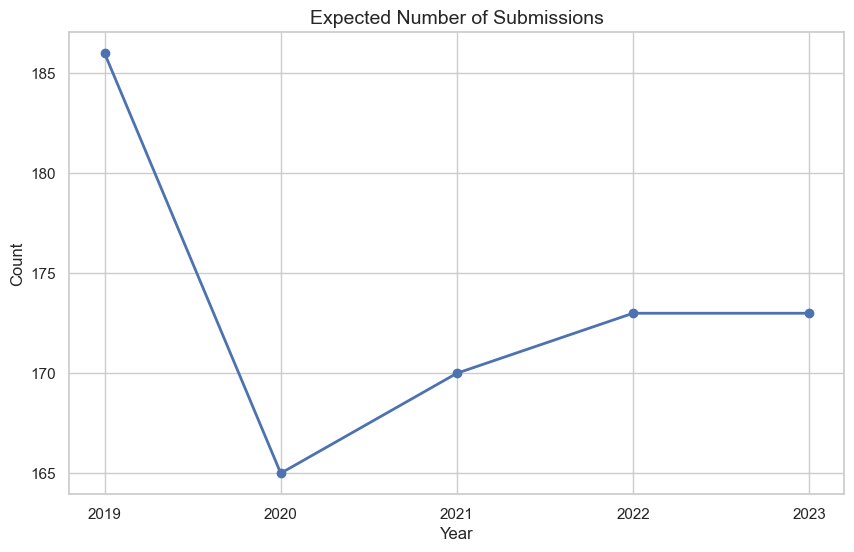

In [260]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

# Create the plot (using plt.figure() or plt.subplots() if needed)
plt.figure(figsize=(10, 6))

# Plot the data for PensionCombined
plt.plot(year_count_table['Year'], year_count_table['Count'], marker='o', color='b', linestyle='-', linewidth=2, markersize=6)

# Add labels and title
plt.title('Expected Number of Submissions', fontsize=14)  
plt.xlabel('Year', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Use MaxNLocator to format the x-axis labels to avoid commas and make them whole numbers
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))

# Add gridlines
plt.grid(True)

# Show the plot
plt.show()


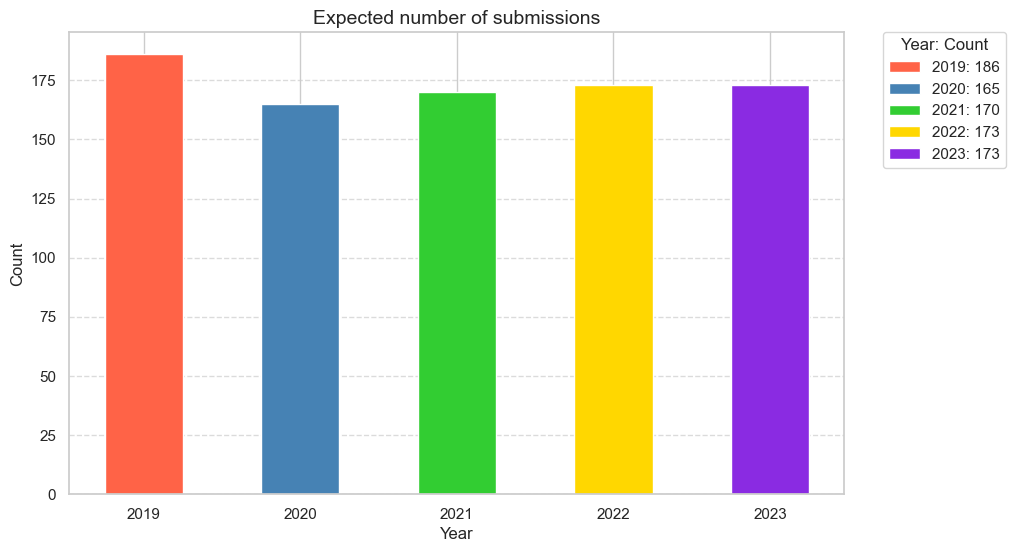

In [261]:

from matplotlib.ticker import MaxNLocator
import numpy as np


# Create the plot and assign it to a variable named plt_pension_combined
plt_pension_combined = plt.figure(figsize=(10, 6))

#  list of colors to use for each bar
colors = ['#FF6347', '#4682B4', '#32CD32', '#FFD700', '#8A2BE2']  

# Plot the data as a bar chart with different colors for each bar
bars = plt.bar(year_count_table['Year'], year_count_table['Count'], color=colors, width=0.5)

# Add labels and title
plt.title('Expected number of submissions', fontsize=14)  # Title for the specific plot
plt.xlabel('Year', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Use MaxNLocator to ensure the x-axis labels are whole numbers without commas
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))

# to create a label for each bar and assign it manually to the legend
for i, bar in enumerate(bars):
    bar.set_label(f'{year_count_table["Year"][i]}: {int(bar.get_height())}')  # Set label for each bar

# Add the legend on the right side of the plot
plt.legend(title='Year: Count', loc='upper left', bbox_to_anchor=(1.05, 1), borderaxespad=0.)


# Display the graph with the specific name
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Show the plot named plt_pension_combined
plt.show()


In [262]:
# Initialize an empty dictionary to store counts for each status
status_counts = {}

# List of status types we're interested in
status_types = ['Done', 'Partial', 'Pending', 'Troubled', 'Dissolution', 'New fund', 'exemption']

# Loop through each year and count the occurrences of each status
for year in pendata_combined['year'].unique():
    year_data = pendata_combined[pendata_combined['year'] == year]
    
    # Initialize a dictionary to store counts for this year
    year_status_counts = {
        'Year': year,
        'Submitted': len(year_data[year_data['submission_sts_'] == 'Done']),
        'Partial': len(year_data[year_data['submission_sts_'] == 'Partial']),
        'Pending': len(year_data[year_data['submission_sts_'] == 'Pending']),
        'Dissolution': len(year_data[year_data['submission_sts_'] == 'Dissolution']),
        'New fund': len(year_data[year_data['submission_sts_'] == 'New fund']),
        'Exemption': len(year_data[year_data['submission_sts_'] == 'exemption']),
        'Troubled': len(year_data[year_data['submission_sts_'] == 'Troubled']),
        'Other': len(year_data[~year_data['submission_sts_'].isin(status_types)])
    }
    
    status_counts[year] = year_status_counts

# Convert the status_counts dictionary to a DataFrame
status_table = pd.DataFrame(status_counts).T  # .T to transpose the dictionary to a DataFrame
# Reset index and drop the default index column that is added when creating a DataFrame
status_table = status_table.reset_index(drop=True)

# Replace NaN values with 0
status_table = status_table.fillna(0)

# Convert all columns to integers (whole numbers)
status_table = status_table.astype(int)
# Remove the row where all values are zero
status_table = status_table[(status_table != 0).any(axis=1)]

# Add borders to the table
status_table_styled = status_table.style.set_table_styles(
    [{'selector': 'table', 'props': [('border', '1px solid black')]},
     {'selector': 'th', 'props': [('border', '1px solid black')]},
     {'selector': 'td', 'props': [('border', '1px solid black')]},
     {'selector': 'tr', 'props': [('border', '1px solid black')]}]
)

# Display the styled table
status_table_styled


,Year,Submitted,Partial,Pending,Dissolution,New fund,Exemption,Troubled,Other
0,2019,57,55,72,1,0,0,0,1
1,2020,149,0,1,3,1,2,6,3
2,2021,149,0,6,4,1,0,6,4
3,2022,140,0,16,4,1,0,4,8
4,2023,112,1,60,0,0,0,0,0


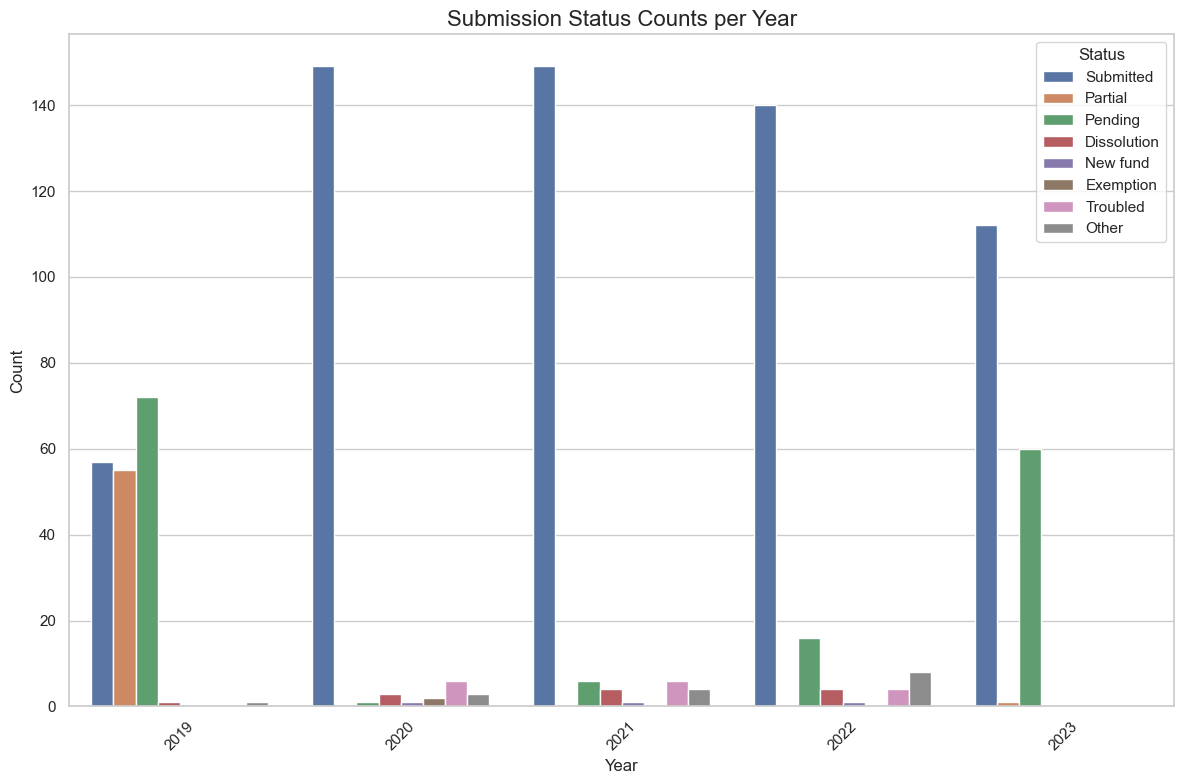

In [263]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for seaborn (optional but for better visuals)
sns.set(style="whitegrid")

# Create a new DataFrame that is suitable for a bar plot
status_table_long = status_table.melt(id_vars='Year', var_name='Status', value_name='Count')

# Create a bar plot
plt.figure(figsize=(12, 8))
bar_plot = sns.barplot(data=status_table_long, x='Year', y='Count', hue='Status')

# Customize the plot
plt.title('Submission Status Counts per Year', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Status', loc='upper right')
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()


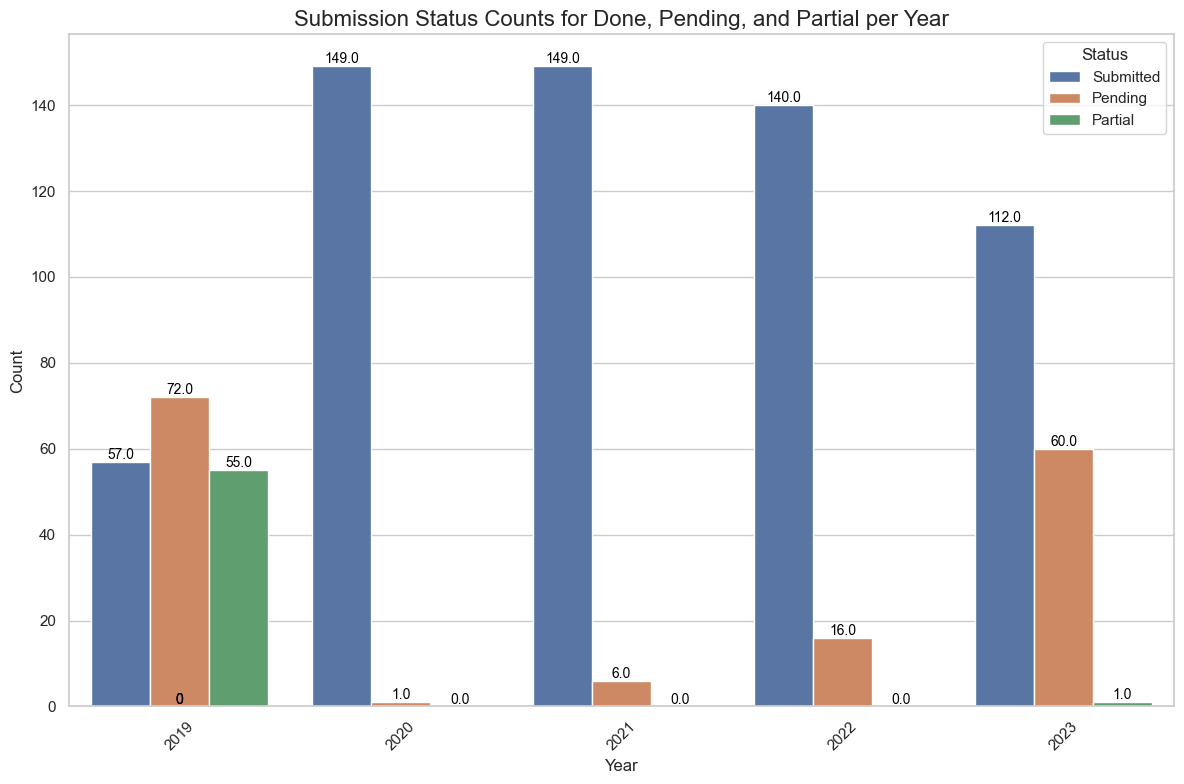

In [264]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for seaborn
sns.set(style="whitegrid")



# Filter the status types to only include 'Done', 'Pending', and 'Partial'
filtered_status_types = ['Submitted', 'Pending', 'Partial']

# Ensure the columns exist before proceeding
if all(status in status_table.columns for status in filtered_status_types):
    # Melt the DataFrame to long format, but only keep the filtered statuses
    status_table_long_filtered = status_table.melt(id_vars='Year', 
                                                   value_vars=filtered_status_types, 
                                                   var_name='Status', 
                                                   value_name='Count')



    # Create the bar plot
    plt.figure(figsize=(12, 8))
    ax = sns.barplot(data=status_table_long_filtered, x='Year', y='Count', hue='Status')


# Define custom colors for the status types
    color_palette = ['#1f77b4', '#d62728', '#ff7f0e']  # blue, red, and yellow
    # Customize the plot
    plt.title('Submission Status Counts for Done, Pending, and Partial per Year', fontsize=16)
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.legend(title='Status', loc='upper right')
    plt.xticks(rotation=45)

    # Add count numbers on top of each bar
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', 
                    fontsize=10, color='black', 
                    xytext=(0, 5), textcoords='offset points')

    # Show the plot
    plt.tight_layout()
    plt.show()
else:
    print("Some of the status columns are missing from the DataFrame.")


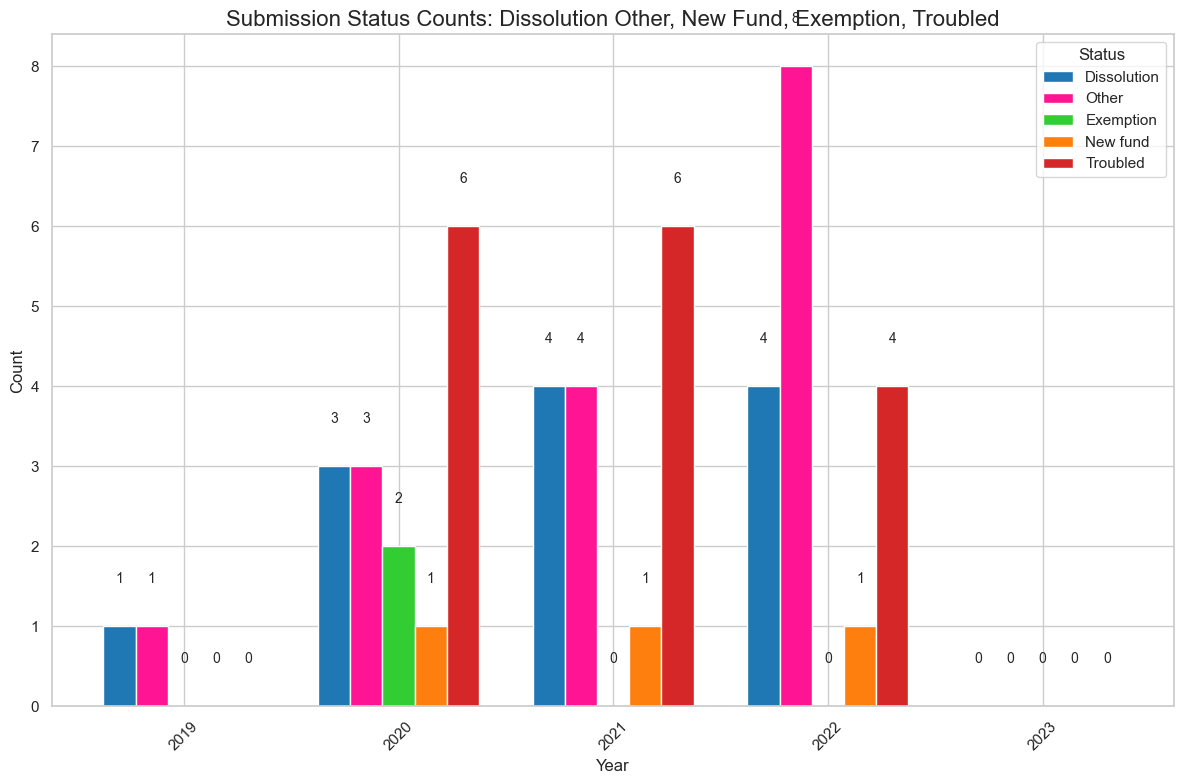

In [265]:
import matplotlib.pyplot as plt
import numpy as np

# Define the statuses we want to plot
statuses = [ 'Dissolution','Other', 'Exemption','New fund', 'Troubled',]

# Create a new DataFrame suitable for a grouped bar chart
status_counts_by_year = {}

# Loop through each year and extract counts for each status
for year in status_table['Year'].unique():
    year_data = status_table[status_table['Year'] == year]
    
    # For each status, count how many times it's greater than 0 for that year
    year_counts = [year_data[status].sum() for status in statuses]
    status_counts_by_year[year] = year_counts

# Convert status counts into a DataFrame
import pandas as pd
status_counts_df = pd.DataFrame(status_counts_by_year, index=statuses).T

# Create a figure and axis for the bar chart
plt.figure(figsize=(12, 8))

# Set positions for each bar
bar_width = 0.15
index = np.arange(len(status_counts_df))

# Define colors for the statuses
colors = ['#1f77b4', '#ff1493', '#32cd32', '#ff7f0e', '#d62728']

# Plot bars for each status type (each status will have bars for each year)
for i, status in enumerate(statuses):
    plt.bar(index + i * bar_width, status_counts_df[status], 
            bar_width, label=status, color=colors[i])

# Customize the plot
plt.title('Submission Status Counts: Dissolution Other, New Fund, Exemption, Troubled', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(index + bar_width * 2, status_counts_df.index, rotation=45)  # Position labels at the center of the grouped bars
plt.legend(title='Status', loc='upper right')

# Add count numbers on top of each bar
for i, status in enumerate(statuses):
    for j, count in enumerate(status_counts_df[status]):
        plt.text(index[j] + i * bar_width, count + 0.5,  # Offset for the text
                 f'{count}', ha='center', va='bottom', fontsize=10)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


In [266]:
import pandas as pd

# Initialize an empty dictionary to store counts for each status
assessmentstatus_counts = {}

# List of status types we're interested in
assessmentstatus_types = ['Done', 'Pending', 'Troubled', 'Dissolution', 'New fund', 'exemption']

# Loop through each year and count the occurrences of each status
for year in pendata_combined['year'].unique():
    year_data = pendata_combined[pendata_combined['year'] == year]
    
    # Initialize a dictionary to store counts for this year
    year_assessmentstatus_counts = {
        'Year': year,
        'Assessed': len(year_data[year_data['assessment_sts'] == 'Done']),
        'Non assessed': len(year_data[year_data['assessment_sts'] == 'Pending']),
        'Partial': len(year_data[year_data['assessment_sts'] == 'Partial']),
        'Non assessed': len(year_data[year_data['assessment_sts'] == 'Pending']),
        'Dissolution': len(year_data[year_data['assessment_sts'] == 'Dissolution']),
        'New fund': len(year_data[year_data['assessment_sts'] == 'New fund']),
        'Exemption': len(year_data[year_data['assessment_sts'] == 'exemption']),
        'Troubled': len(year_data[year_data['assessment_sts'] == 'Troubled']),
        'Other': len(year_data[~year_data['assessment_sts'].isin(assessmentstatus_types)])
    }
    
    assessmentstatus_counts[year] = year_assessmentstatus_counts

# Convert the status_counts dictionary to a DataFrame
assessmentstatus_table = pd.DataFrame(assessmentstatus_counts).T  # .T to transpose the dictionary to a DataFrame
# Reset index and drop the default index column that is added when creating a DataFrame
assessmentstatus_table = assessmentstatus_table.reset_index(drop=True)

# Replace NaN values with 0
assessmentstatus_table = assessmentstatus_table.fillna(0)

# Convert all columns to integers (whole numbers)
assessmentstatus_table = assessmentstatus_table.astype(int)

# Remove the row where all values are zero
assessmentstatus_table = assessmentstatus_table[(assessmentstatus_table != 0).any(axis=1)]

# Add borders to the table
assessmentstatus_table_styled = assessmentstatus_table.style.set_table_styles(
    [{'selector': 'table', 'props': [('border', '1px solid black')]},
     {'selector': 'th', 'props': [('border', '1px solid black')]},
     {'selector': 'td', 'props': [('border', '1px solid black')]},
     {'selector': 'tr', 'props': [('border', '1px solid black')]}]
)

# Display the styled table
assessmentstatus_table_styled


,Year,Assessed,Non assessed,Partial,Dissolution,New fund,Exemption,Troubled,Other
0,2019,152,2,0,17,0,0,4,11
1,2020,149,16,0,0,0,0,0,0
2,2021,148,0,0,0,0,0,0,22
3,2022,138,16,0,2,0,0,0,17
4,2023,104,69,0,0,0,0,0,0


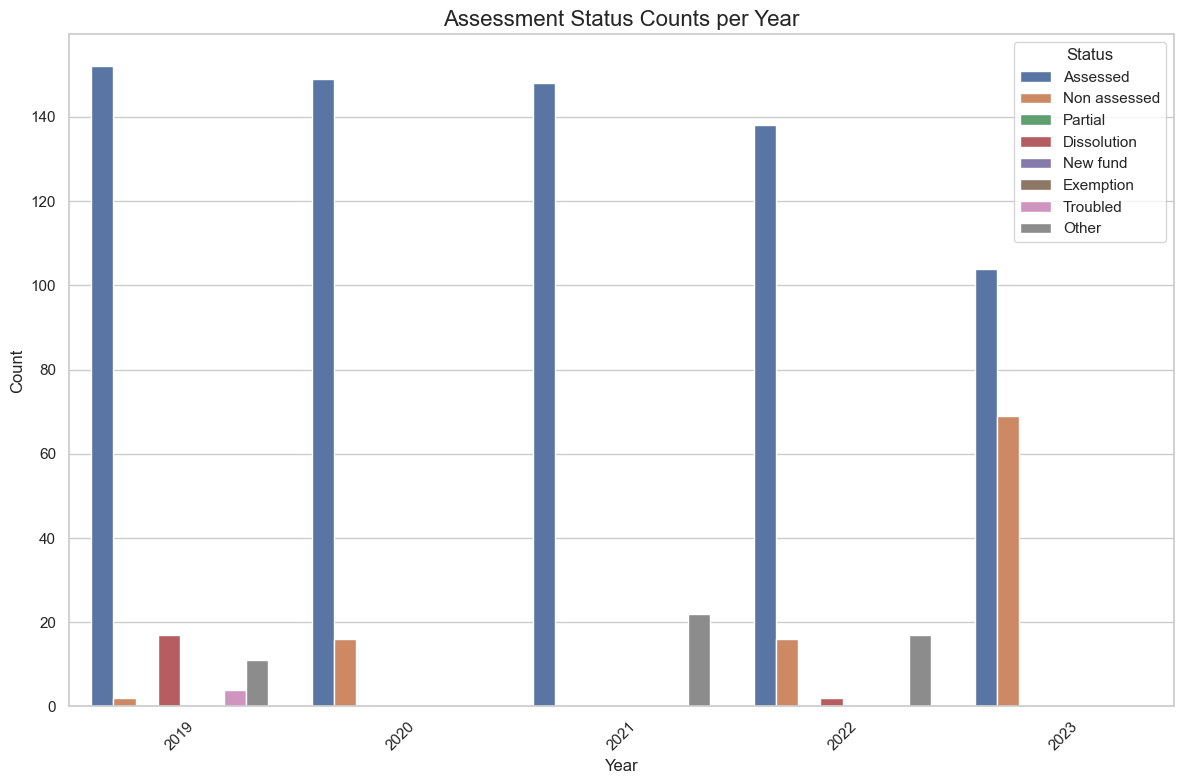

In [267]:


# Set the style for seaborn (optional but for better visuals)
sns.set(style="whitegrid")

# Create a new DataFrame that is suitable for a bar plot
# Ensure you use the correct variable name ('assessmentstatus_table')
assessmentstatus_table_long = assessmentstatus_table.melt(id_vars='Year', var_name='Status', value_name='Count')

# Create a bar plot
plt.figure(figsize=(12, 8))
bar_plot = sns.barplot(data=assessmentstatus_table_long, x='Year', y='Count', hue='Status')

# Customize the plot
plt.title('Assessment Status Counts per Year', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Status', loc='upper right')
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()


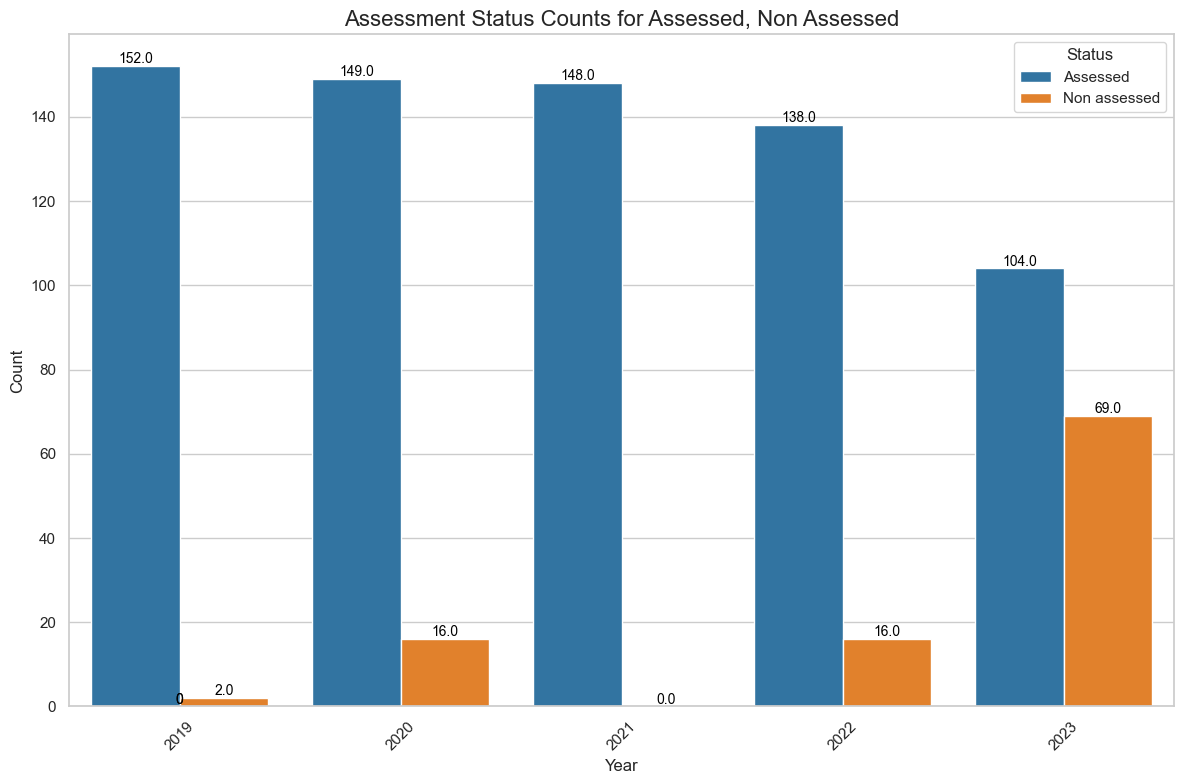

In [268]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style for seaborn
sns.set(style="whitegrid")

# Filter the status types to only include 'Assessed' and 'Non Assessed'
filtered_assessmentstatus_types = ['Assessed', 'Non assessed']  # Ensure this matches the column names exactly

# Ensure the columns exist before proceeding
if all(status in assessmentstatus_table.columns for status in filtered_assessmentstatus_types):
    # Melt the DataFrame to long format, but only keep the filtered statuses
    assessmentstatus_table_long_filtered = assessmentstatus_table.melt(id_vars='Year', 
                                                   value_vars=filtered_assessmentstatus_types, 
                                                   var_name='Status', 
                                                   value_name='Count')

    # Create the bar plot
    plt.figure(figsize=(12, 8))
    ax = sns.barplot(data=assessmentstatus_table_long_filtered, x='Year', y='Count', hue='Status', palette=['#1f77b4', '#ff7f0e'])  # Adjusted the palette to two colors

    # Customize the plot
    plt.title('Assessment Status Counts for Assessed, Non Assessed', fontsize=16)
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.legend(title='Status', loc='upper right')
    plt.xticks(rotation=45)

    # Add count numbers on top of each bar
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', 
                    fontsize=10, color='black', 
                    xytext=(0, 5), textcoords='offset points')

    # Show the plot
    plt.tight_layout()
    plt.show()
else:
    print("Some of the status columns are missing from the DataFrame.")


In [269]:
import pandas as pd

# Initialize an empty dictionary to store counts for each status
approvalstatus_counts = {}

# List of status types we're interested in
approvalstatus_types = ['Yes', 'No', 'pending']

# Loop through each year and count the occurrences of each status
for year in pendata_combined['year'].unique():
    year_data = pendata_combined[pendata_combined['year'] == year]
    
    # Initialize a dictionary to store counts for this year
    year_approvalstatus_counts = {
        'Year': year,
        'Approved': len(year_data[year_data['approval_sts'] == 'Yes']),
        'Non approved': len(year_data[year_data['approval_sts'] == 'No']),  
        'Pending': len(year_data[year_data['approval_sts'] == 'pending']),  
        'Not populated': len(year_data[~year_data['approval_sts'].isin(approvalstatus_types)]),  # Corrected to check if status is not in the list
    }
    
    # Store the counts for this year
    approvalstatus_counts[year] = year_approvalstatus_counts

# Convert the approvalstatus_counts dictionary to a DataFrame
approvalstatus_table = pd.DataFrame(approvalstatus_counts).T  # .T to transpose the dictionary to a DataFrame
# Reset index and drop the default index column that is added when creating a DataFrame
approvalstatus_table = approvalstatus_table.reset_index(drop=True)

# Replace NaN values with 0
approvalstatus_table = approvalstatus_table.fillna(0)

# Convert all columns to integers (whole numbers)
approvalstatus_table = approvalstatus_table.astype(int)
#Remove rows where 'Year' is 0 (i.e., blank rows)
approvalstatus_table = approvalstatus_table[approvalstatus_table['Year'] != 0]
# Remove the row where all values are zero
approvalstatus_table = approvalstatus_table[(approvalstatus_table != 0).any(axis=1)]

# Add borders to the table for better visibility
approvalstatus_table_styled = approvalstatus_table.style.set_table_styles(
    [{'selector': 'table', 'props': [('border', '1px solid black')]},
     {'selector': 'th', 'props': [('border', '1px solid black')]},
     {'selector': 'td', 'props': [('border', '1px solid black')]},
     {'selector': 'tr', 'props': [('border', '1px solid black')]}]
)

# Display the styled table
approvalstatus_table_styled


,Year,Approved,Non approved,Pending,Not populated
0,2019,94,0,2,90
1,2020,131,0,2,32
2,2021,59,1,2,108
3,2022,92,21,29,31
4,2023,30,0,143,0


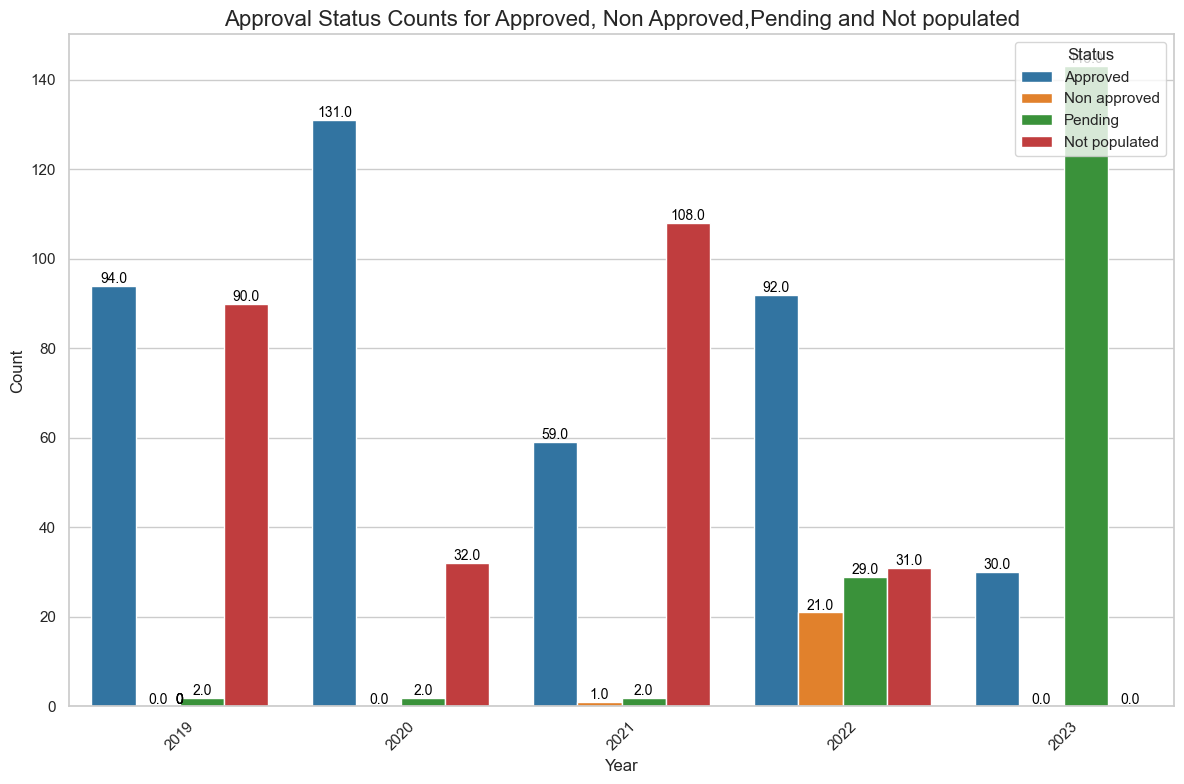

In [270]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style for seaborn
sns.set(style="whitegrid")

# Filter the status types to include 'Approved', 'Non approved', and 'Not yet Assessed'
filtered_approvalstatus_types = ['Approved', 'Non approved','Pending', 'Not populated']  # Ensure this matches the column names exactly

# Ensure the columns exist before proceeding
if all(status in approvalstatus_table.columns for status in filtered_approvalstatus_types):
    # Melt the DataFrame to long format, but only keep the filtered statuses
    approvalstatus_table_long_filtered = approvalstatus_table.melt(id_vars='Year', 
                                                                  value_vars=filtered_approvalstatus_types, 
                                                                  var_name='Status', 
                                                                  value_name='Count')

    # Create the bar plot
    plt.figure(figsize=(12, 8))
    ax = sns.barplot(data=approvalstatus_table_long_filtered, x='Year', y='Count', hue='Status', 
                     palette=['#1f77b4', '#ff7f0e', '#2ca02c','#d62728',])  # Adjusted the palette to three colors

    # Customize the plot
    plt.title('Approval Status Counts for Approved, Non Approved,Pending and Not populated', fontsize=16)
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.legend(title='Status', loc='upper right')
    plt.xticks(rotation=45)

    # Add count numbers on top of each bar
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', 
                    fontsize=10, color='black', 
                    xytext=(0, 5), textcoords='offset points')

    # Show the plot
    plt.tight_layout()
    plt.show()
else:
    print("Some of the approval status columns are missing from the DataFrame.")


In [271]:
approvalstatus_table['Growth (%)'] = approvalstatus_table['Approved'].pct_change() * 100
# Replace NaN in YoY Growth with 0 before formatting
approvalstatus_table['Growth (%)'] = approvalstatus_table['Growth (%)'].fillna(0)

display(approvalstatus_table)

,Year,Approved,Non approved,Pending,Not populated,Growth (%)
0,2019,94,0,2,90,0.000000
1,2020,131,0,2,32,39.361702
2,2021,59,1,2,108,-54.961832
3,2022,92,21,29,31,55.932203
4,2023,30,0,143,0,-67.391304


<Axes: xlabel='Year', ylabel='Proportion Approved'>

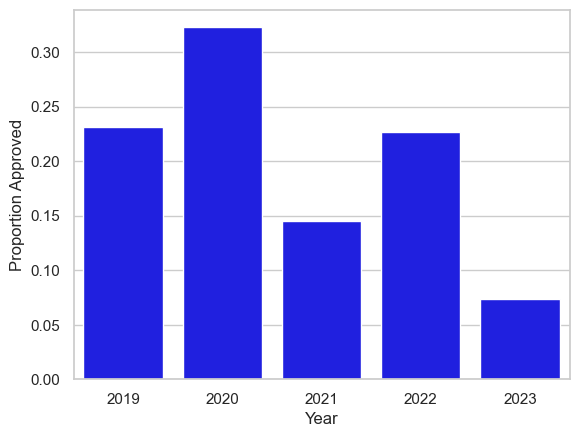

In [272]:
approvalstatus_table['Proportion Approved'] = approvalstatus_table['Approved'] / approvalstatus_table['Approved'].sum()
sns.barplot(data=approvalstatus_table, x='Year', y='Proportion Approved', color='blue')


In [273]:
# Loop through each column to handle NaN replacement
for col in pendata_combined.columns:
    # Check if the column can be converted to numeric
    if pd.api.types.is_numeric_dtype(pendata_combined[col]):
        # Fill NaN in numeric columns with 0
        pendata_combined[col].fillna(0, inplace=True)
    else:
        # Fill NaN in non-numeric columns with 'Not Populated'
        pendata_combined[col].fillna('Not Populated', inplace=True)




pendata_combined.loc[pendata_combined.year==2019]



C:\Users\ichingeya\AppData\Local\Temp\ipykernel_18964\1108103796.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  pendata_combined[col].fillna('Not Populated', inplace=True)
C:\Users\ichingeya\AppData\Local\Temp\ipykernel_18964\1108103796.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves 

,name_of_fund,submission_sts_,assessment_sts,approval_sts,year,sts,responsible_person,report_location,reason_for_not_approving,missing_resolution,...,supervisory_letter_sent_yes_no_exemption_dissolution,conditional_approval_to_proceed,verification_satus,director_review,director_review_reminder,modified_by,principal_analyst,missing_documents_,item_type,path
0,African Banking Corporation Zimbabwe,Done,Done,Yes,2019.0,Active Fund,Isheanesu Chingeya,Not Populated,Assessment report submitted to the fund,0.0,...,Yes,Not Populated,Not Populated,Yes,Yes,Isheanesu Chingeya,Memory Macharaga,0.0,Item,sites/ActuarialTeam/Lists/Pensions Guidance Pa...
1,African Distillers,Done,Done,Yes,2019.0,Active Fund,Not Populated,CORE DEPARTMENT,Not Populated,0.0,...,Yes,Not Populated,Not Populated,Yes,Yes,Mqhele B. Ncube,Memory Macharaga,0.0,Item,sites/ActuarialTeam/Lists/Pensions Guidance Pa...
2,Agribank,Pending,Done,pending,2019.0,Active Fund,Not Populated,Not Populated,Not Populated,0.0,...,Yes,Not Populated,Not Populated,Not Populated,Not Populated,Mqhele B. Ncube,Memory Macharaga,0.0,Item,sites/ActuarialTeam/Lists/Pensions Guidance Pa...
3,Air Zimbabwe,Pending,Done,Yes,2019.0,Active Fund,Not Populated,Not Populated,Not Populated,0.0,...,Yes,Not Populated,Not Populated,Not Populated,Not Populated,Best T. Mabhugu,Memory Macharaga,0.0,Item,sites/ActuarialTeam/Lists/Pensions Guidance Pa...
4,Allied Timbers Holdings,Partial,Done,Not Populated,2019.0,Active Fund,Not Populated,Not Populated,Yes,0.0,...,Yes,Not Populated,Not Populated,Not Populated,Not Populated,Mqhele B. Ncube,Memory Macharaga,0.0,Item,sites/ActuarialTeam/Lists/Pensions Guidance Pa...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,ZARWU,Pending,Exception,Not Populated,2019.0,Troubled funds,Not Populated,Not Populated,Requested exemption-small fund,0.0,...,Not Populated,Not Populated,Not Populated,Not Populated,Not Populated,Isheanesu Chingeya,Not Populated,0.0,Item,sites/ActuarialTeam/Lists/Pensions Guidance Pa...
182,Surgimed Pension Fund,Pending,Pending,Not Populated,2019.0,Troubled funds,Not Populated,Not Populated,Not Populated,0.0,...,Not Populated,Not Populated,Not Populated,Not Populated,Not Populated,Isheanesu Chingeya,Not Populated,0.0,Item,sites/ActuarialTeam/Lists/Pensions Guidance Pa...
183,MBCA Bank Pension Fund,Pending,Pending,Not Populated,2019.0,Troubled funds,Not Populated,Not Populated,No reports from pensions,0.0,...,Not Populated,Not Populated,Not Populated,Not Populated,Not Populated,Isheanesu Chingeya,Not Populated,0.0,Item,sites/ActuarialTeam/Lists/Pensions Guidance Pa...
487,AMG pension fund,Done,Done,Yes,2019.0,Active Fund,Mqhele B. Ncube,MANAGER,Not Populated,0.0,...,Not Populated,Not Populated,Not Populated,Not Populated,Not Populated,Mqhele B. Ncube,Not Populated,0.0,Item,sites/ActuarialTeam/Lists/Pensions Guidance Pa...


In [274]:
# Filter data for 2019
pendata_2019 = pendata_combined[pendata_combined['year'] == 2019]


In [275]:
# Map the submission statuses to new categories
pendata_2019['submission_status'] = pendata_2019['submission_sts_'].apply(
    lambda x: 'Submitted' if x == 'Done' else ('Partial' if x == 'Partial' else ('Pending' if x == 'Pending' else 'Other'))

)


C:\Users\ichingeya\AppData\Local\Temp\ipykernel_18964\3940018425.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pendata_2019['submission_status'] = pendata_2019['submission_sts_'].apply(


In [276]:
# Create a table of submission status counts
submission_status_table2019 = pendata_2019['submission_status'].value_counts().reset_index()
submission_status_table2019.columns = ['Submission Status', 'Count']
print(submission_status_table2019)


  Submission Status  Count
0           Pending     72
1         Submitted     57
2           Partial     55
3             Other      2


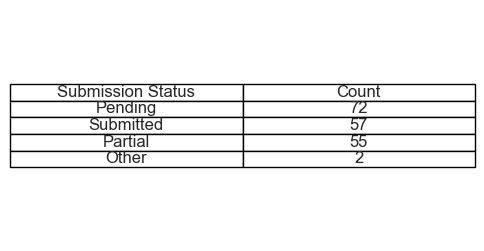

In [277]:
# Create a table of submission status counts
submission_status_table2019 = pendata_2019['submission_status'].value_counts().reset_index()
submission_status_table2019.columns = ['Submission Status', 'Count']

# Display the table with borders
fig, ax = plt.subplots(figsize=(6, 3))
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=submission_status_table2019.values, colLabels=submission_status_table2019.columns, loc='center', cellLoc='center')

# Add borders around the table
for (i, j), cell in table.get_celld().items():
    cell.set_edgecolor('black')  # Set the border color
    cell.set_linewidth(1)        # Set the border thickness
plt.show()


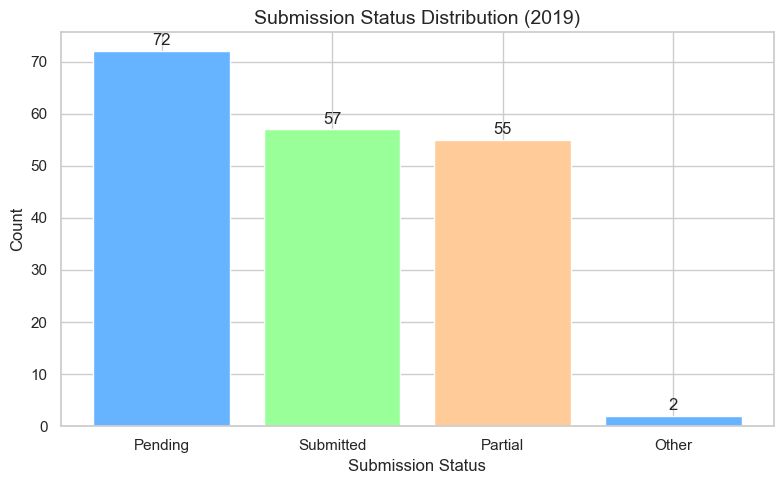

In [278]:
import matplotlib.pyplot as plt

# Bar chart with different colors and count labels
colors = ['#66b3ff', '#99ff99', '#ffcc99']  # Define different colors for each bar
fig, ax = plt.subplots(figsize=(8, 5))

# Plot the bar chart with custom colors
bars = ax.bar(submission_status_table2019['Submission Status'], submission_status_table2019['Count'], color=colors)

# Add title and labels
ax.set_title('Submission Status Distribution (2019)', fontsize=14)
ax.set_xlabel('Submission Status', fontsize=12)
ax.set_ylabel('Count', fontsize=12)

# Add count labels on the bars
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval + 0.5, str(int(yval)), ha='center', va='bottom', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


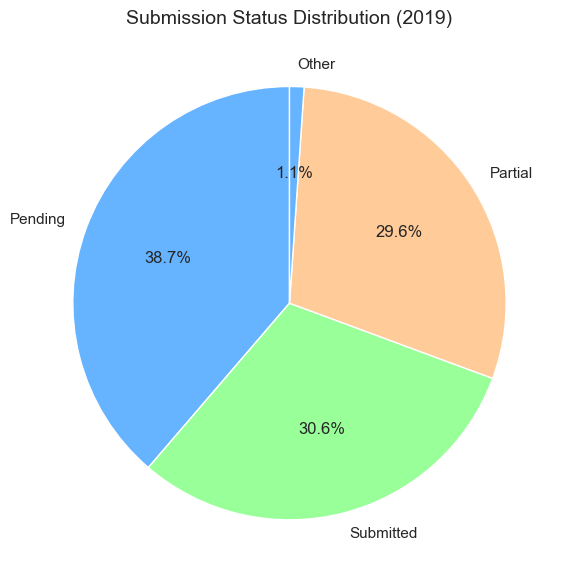

In [279]:
# Pie chart
plt.figure(figsize=(6, 6))
pendata_2019['submission_status'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['#66b3ff', '#99ff99', '#ffcc99'], startangle=90)
plt.title('Submission Status Distribution (2019)', fontsize=14)
plt.ylabel('')  # Remove the ylabel
plt.tight_layout()
plt.show()


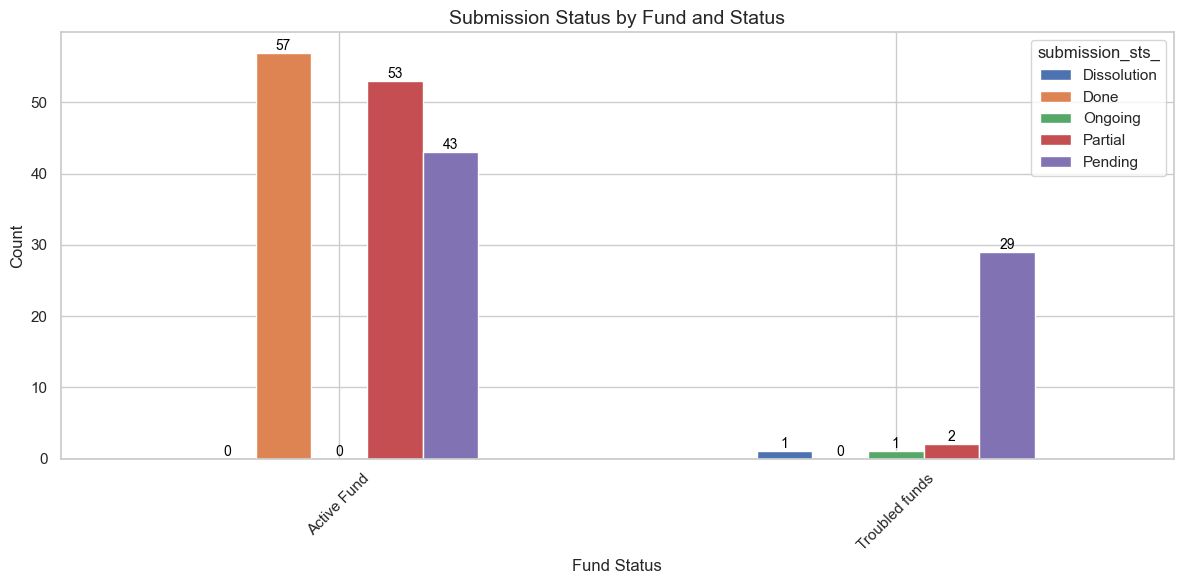

In [280]:

# Group by 'name_of_fund', 'sts' and 'submission_sts_', then unstack to reshape for the bar chart
fund_status_submission2019 = pendata_2019.groupby([ 'sts', 'submission_sts_']).size().unstack().fillna(0)

# Plotting a bar chart (not stacked)
ax = fund_status_submission2019.plot(kind='bar', figsize=(12, 6))

# Set the title and labels
plt.title('Submission Status by Fund and Status', fontsize=14)
plt.xlabel('Fund Status', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add count numbers on top of the bars
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=10, color='black')

# Show the plot
plt.tight_layout()  # Adjust layout for better spacing
plt.show()


In [281]:
# Classify the assessment status in 2019
pendata_2019['assessment_status_category'] = pendata_2019['assessment_sts'].apply(
    lambda x: 'Assessed' if x == 'Done' else ('Pending' if x == 'Pending' else 'Other')
)


C:\Users\ichingeya\AppData\Local\Temp\ipykernel_18964\877058259.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pendata_2019['assessment_status_category'] = pendata_2019['assessment_sts'].apply(


In [282]:
# Perform counts for assessment status categories in 2019
assessment_status_table_2019 = pendata_2019['assessment_status_category'].value_counts().reset_index()
assessment_status_table_2019.columns = ['Assessment Status', 'Count']

# Display the table with borders
assementstatusstyled_table2019 = assessment_status_table_2019.style.set_table_styles(
    [{'selector': 'table', 'props': [('border', '2px solid black')]}, 
     {'selector': 'th', 'props': [('border', '2px solid black')]}, 
     {'selector': 'td', 'props': [('border', '2px solid black')]}]
)

# Display the styled table
assementstatusstyled_table2019 



,Assessment Status,Count
0,Assessed,152
1,Other,32
2,Pending,2


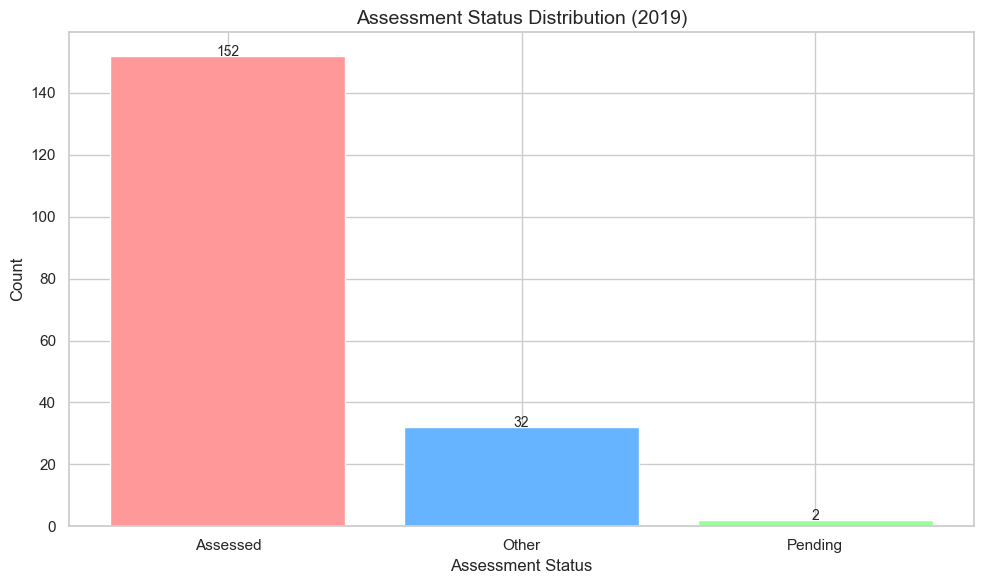

In [283]:


# Get the counts for each assessment status category
assessment_status_counts_2019 = pendata_2019['assessment_status_category'].value_counts()

# Plotting the bar chart for assessment status distribution
plt.figure(figsize=(10, 6))
bars = plt.bar(assessment_status_counts_2019.index, assessment_status_counts_2019.values, color=['#ff9999', '#66b3ff', '#99ff99'])

# Adding title and labels
plt.title('Assessment Status Distribution (2019)', fontsize=14)
plt.xlabel('Assessment Status', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Adding the count numbers on top of the bars
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.05, 
             f'{int(bar.get_height())}', ha='center', fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()


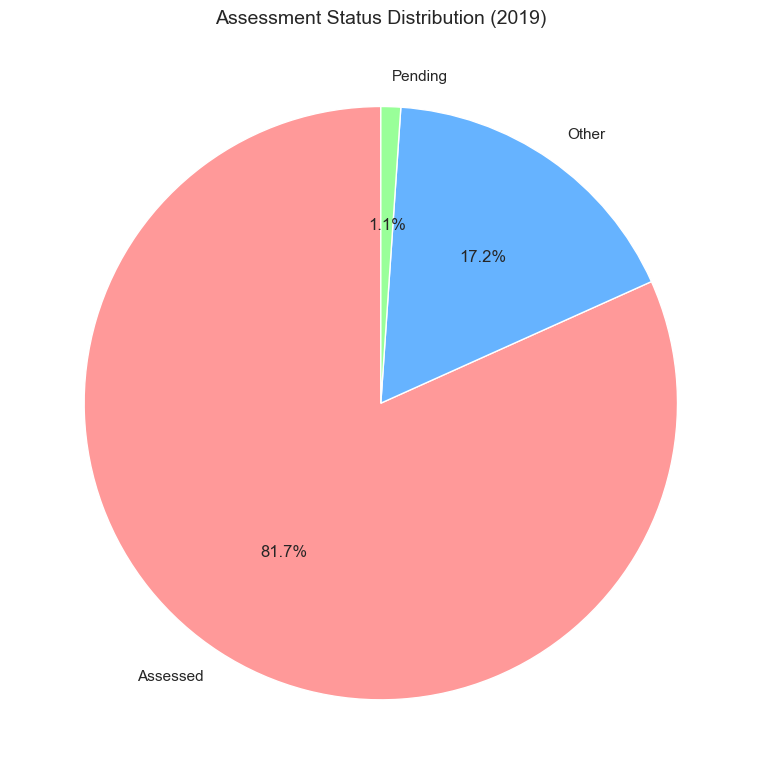

In [284]:
import matplotlib.pyplot as plt

# Get the counts for each assessment status category
assessment_status_counts_2019 = pendata_2019['assessment_status_category'].value_counts()

# Plotting the pie chart for assessment status distribution
plt.figure(figsize=(8, 8))
plt.pie(assessment_status_counts_2019, labels=assessment_status_counts_2019.index, autopct='%1.1f%%', 
        startangle=90, colors=['#ff9999', '#66b3ff', '#99ff99'])

# Adding title
plt.title('Assessment Status Distribution (2019)', fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()


In [285]:
# Count the occurrences of each report location
report_location_counts2019 = pendata_2019['report_location'].value_counts().reset_index()

# Rename the columns for clarity
report_location_counts2019.columns = ['Report Location', 'Count']

# Display the result
print(report_location_counts2019)


   Report Location  Count
0    Not Populated    182
1               PA      2
2  CORE DEPARTMENT      1
3          MANAGER      1


In [286]:
# Apply border styling to the report location count table
reportlocationstyled_table2019 = report_location_counts2019.style.set_table_styles(
    [{'selector': 'table', 'props': [('border', '2px solid black')]}, 
     {'selector': 'th', 'props': [('border', '2px solid black')]}, 
     {'selector': 'td', 'props': [('border', '2px solid black')]}]
)

# Display the styled table
reportlocationstyled_table2019


,Report Location,Count
0,Not Populated,182
1,PA,2
2,CORE DEPARTMENT,1
3,MANAGER,1


In [287]:
# Create a new column for approval status categories based on the given criteria
def categorize_approval_status(status):
    if status == 'Yes':
        return 'Approved'
    elif status == 'pending':
        return 'Pending'
    elif status == 'No':
        return 'No'
    else:
        return 'Not populated'

# Apply the categorization function to the approval status column
pendata_2019['approval_status_category'] = pendata_2019['approval_sts'].apply(categorize_approval_status)




C:\Users\ichingeya\AppData\Local\Temp\ipykernel_18964\3606826127.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pendata_2019['approval_status_category'] = pendata_2019['approval_sts'].apply(categorize_approval_status)


In [288]:
# Count the occurrences of each approval status category
approval_status_counts2019 = pendata_2019['approval_status_category'].value_counts().reset_index()
approval_status_counts2019.columns = ['Approval Status', 'Count']

# Display the result
print(approval_status_counts2019)


  Approval Status  Count
0        Approved     94
1   Not populated     90
2         Pending      2


In [289]:
# Apply border styling to the approval status count table
styled_approval_status_table2019 = approval_status_counts2019.style.set_table_styles(
    [{'selector': 'table', 'props': [('border', '2px solid black')]}, 
     {'selector': 'th', 'props': [('border', '2px solid black')]}, 
     {'selector': 'td', 'props': [('border', '2px solid black')]}]
)

# Display the styled table
styled_approval_status_table2019


,Approval Status,Count
0,Approved,94
1,Not populated,90
2,Pending,2


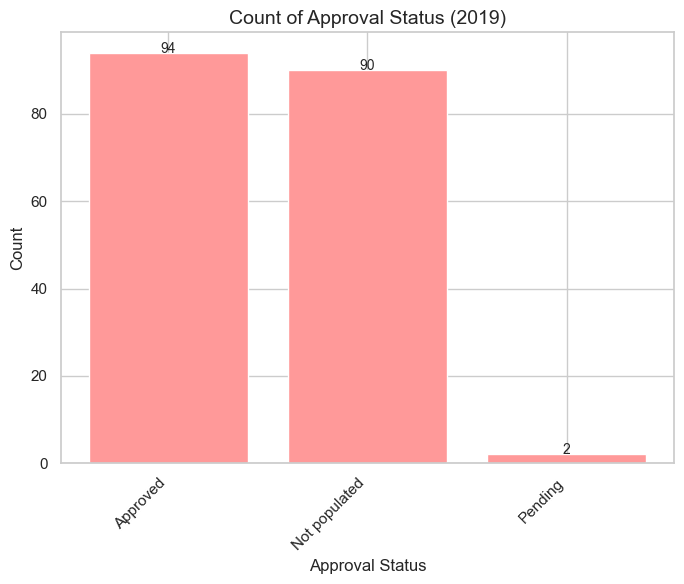

In [290]:


# Plotting the bar chart for approval status categories
plt.figure(figsize=(7, 6))
bars = plt.bar(approval_status_counts2019['Approval Status'], approval_status_counts2019['Count'], color='#ff9999')

# Adding title and labels
plt.title('Count of Approval Status (2019)', fontsize=14)
plt.xlabel('Approval Status', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Adding the count numbers on top of the bars
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.05, 
             f'{int(bar.get_height())}', ha='center', fontsize=10)

# Rotate x-axis labels for readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()


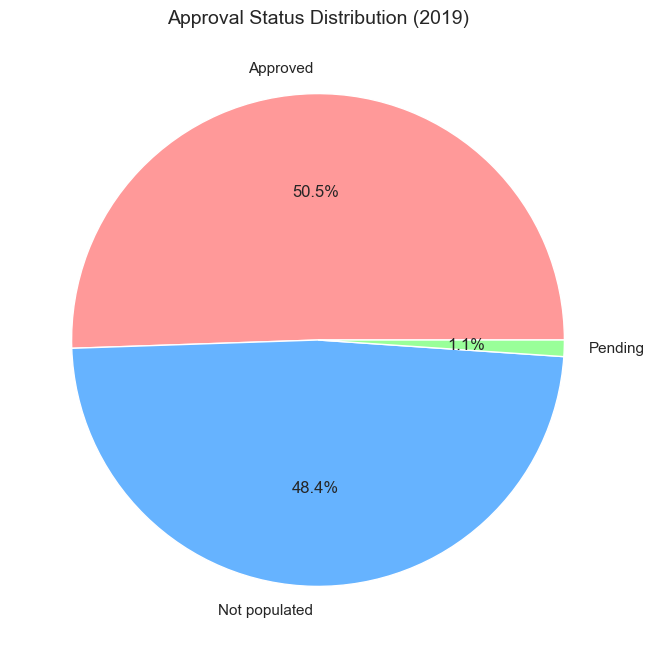

In [291]:
# Plotting the pie chart for approval status categories
plt.figure(figsize=(8, 8))
plt.pie(approval_status_counts2019['Count'], labels=approval_status_counts2019['Approval Status'], autopct='%1.1f%%', colors=['#ff9999', '#66b3ff', '#99ff99'])
plt.title('Approval Status Distribution (2019)', fontsize=14)
plt.show()


In [292]:
#2020 2020 2020 2020 2020 2020 2020 2020 2020 2020 2020 2020 2020

In [293]:
# Loop through each column to handle NaN replacement
for col in pendata_combined.columns:
    # Check if the column can be converted to numeric
    if pd.api.types.is_numeric_dtype(pendata_combined[col]):
        # Fill NaN in numeric columns with 0
        pendata_combined[col].fillna(0, inplace=True)
    else:
        # Fill NaN in non-numeric columns with 'Not Populated'
        pendata_combined[col].fillna('Not Populated', inplace=True)



pendata_combined.loc[pendata_combined.year==2020]



C:\Users\ichingeya\AppData\Local\Temp\ipykernel_18964\1591859926.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  pendata_combined[col].fillna(0, inplace=True)
C:\Users\ichingeya\AppData\Local\Temp\ipykernel_18964\1591859926.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

Fo

,name_of_fund,submission_sts_,assessment_sts,approval_sts,year,sts,responsible_person,report_location,reason_for_not_approving,missing_resolution,...,supervisory_letter_sent_yes_no_exemption_dissolution,conditional_approval_to_proceed,verification_satus,director_review,director_review_reminder,modified_by,principal_analyst,missing_documents_,item_type,path
184,African Associated Mines,Done,Done,Yes,2020.0,Active Fund,Not Populated,Not Populated,Not Populated,0.0,...,Not Populated,Not Populated,Not Populated,Not Populated,Not Populated,Isheanesu Chingeya,Not Populated,0.0,Item,sites/ActuarialTeam/Lists/Pensions Guidance Pa...
185,African Banking Corporation Zimbabwe,Done,Done,Yes,2020.0,Active Fund,Not Populated,Not Populated,Not Populated,0.0,...,Not Populated,Not Populated,Not Populated,Not Populated,Not Populated,Isheanesu Chingeya,Not Populated,0.0,Item,sites/ActuarialTeam/Lists/Pensions Guidance Pa...
186,African Distillers,Done,Done,Yes,2020.0,Active Fund,Kaylee Rusike,Not Populated,Not Populated,0.0,...,Not Populated,Not Populated,Not Populated,Not Populated,Not Populated,Isheanesu Chingeya,Not Populated,0.0,Item,sites/ActuarialTeam/Lists/Pensions Guidance Pa...
187,Agribank,Done,Done,Yes,2020.0,Active Fund,Not Populated,Not Populated,Not Populated,0.0,...,Not Populated,Not Populated,Not Populated,Not Populated,Not Populated,Isheanesu Chingeya,Not Populated,0.0,Item,sites/ActuarialTeam/Lists/Pensions Guidance Pa...
188,Air Zimbabwe,Done,Done,Yes,2020.0,Active Fund,Pardon Nebiri,Not Populated,Not Populated,0.0,...,Not Populated,Not Populated,Not Populated,Not Populated,Not Populated,Isheanesu Chingeya,Not Populated,0.0,Item,sites/ActuarialTeam/Lists/Pensions Guidance Pa...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
344,COTTON COMPANY OF ZIMBABWE,Done,Done,pending,2020.0,Active Fund,Isheanesu Chingeya,MANAGER,Not Populated,0.0,...,Not Populated,Not Populated,Not Populated,Not Populated,Not Populated,Best T. Mabhugu,Memory Macharaga,0.0,Item,sites/ActuarialTeam/Lists/Pensions Guidance Pa...
345,MARATHON GROUP PENSION FUND,Troubled,Pending,Not Yet,2020.0,Active Fund,Not Populated,Not Populated,Not Populated,0.0,...,Not Populated,Not Populated,Not Populated,Not Populated,Not Populated,Isheanesu Chingeya,Not Populated,0.0,Item,sites/ActuarialTeam/Lists/Pensions Guidance Pa...
346,PLATINUM HOLDINGS,Dissolution,Pending,Not Yet,2020.0,Active Fund,Not Populated,Not Populated,Not Populated,0.0,...,Not Populated,Not Populated,Not Populated,Not Populated,Not Populated,Isheanesu Chingeya,Not Populated,0.0,Item,sites/ActuarialTeam/Lists/Pensions Guidance Pa...
862,BAZ,Done,Done,pending,2020.0,Active Fund,Not Populated,PA,Not Populated,0.0,...,Not Populated,Not Populated,Not Populated,Not Populated,Not Populated,Best T. Mabhugu,Not Populated,0.0,Item,sites/ActuarialTeam/Lists/Pensions Guidance Pa...


In [294]:
# Loop through each column to handle NaN replacement
for col in pendata_combined.columns:
    # Check if the column can be converted to numeric
    if pd.api.types.is_numeric_dtype(pendata_combined[col]):
        # Fill NaN in numeric columns with 0
        pendata_combined[col].fillna(0, inplace=True)
    else:
        # Fill NaN in non-numeric columns with 'Not Populated'
        pendata_combined[col].fillna('Not Populated', inplace=True)


C:\Users\ichingeya\AppData\Local\Temp\ipykernel_18964\594604888.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  pendata_combined[col].fillna(0, inplace=True)
C:\Users\ichingeya\AppData\Local\Temp\ipykernel_18964\594604888.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For 

In [295]:
pendata_combined.loc[pendata_combined.year == 2020]


,name_of_fund,submission_sts_,assessment_sts,approval_sts,year,sts,responsible_person,report_location,reason_for_not_approving,missing_resolution,...,supervisory_letter_sent_yes_no_exemption_dissolution,conditional_approval_to_proceed,verification_satus,director_review,director_review_reminder,modified_by,principal_analyst,missing_documents_,item_type,path
184,African Associated Mines,Done,Done,Yes,2020.0,Active Fund,Not Populated,Not Populated,Not Populated,0.0,...,Not Populated,Not Populated,Not Populated,Not Populated,Not Populated,Isheanesu Chingeya,Not Populated,0.0,Item,sites/ActuarialTeam/Lists/Pensions Guidance Pa...
185,African Banking Corporation Zimbabwe,Done,Done,Yes,2020.0,Active Fund,Not Populated,Not Populated,Not Populated,0.0,...,Not Populated,Not Populated,Not Populated,Not Populated,Not Populated,Isheanesu Chingeya,Not Populated,0.0,Item,sites/ActuarialTeam/Lists/Pensions Guidance Pa...
186,African Distillers,Done,Done,Yes,2020.0,Active Fund,Kaylee Rusike,Not Populated,Not Populated,0.0,...,Not Populated,Not Populated,Not Populated,Not Populated,Not Populated,Isheanesu Chingeya,Not Populated,0.0,Item,sites/ActuarialTeam/Lists/Pensions Guidance Pa...
187,Agribank,Done,Done,Yes,2020.0,Active Fund,Not Populated,Not Populated,Not Populated,0.0,...,Not Populated,Not Populated,Not Populated,Not Populated,Not Populated,Isheanesu Chingeya,Not Populated,0.0,Item,sites/ActuarialTeam/Lists/Pensions Guidance Pa...
188,Air Zimbabwe,Done,Done,Yes,2020.0,Active Fund,Pardon Nebiri,Not Populated,Not Populated,0.0,...,Not Populated,Not Populated,Not Populated,Not Populated,Not Populated,Isheanesu Chingeya,Not Populated,0.0,Item,sites/ActuarialTeam/Lists/Pensions Guidance Pa...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
344,COTTON COMPANY OF ZIMBABWE,Done,Done,pending,2020.0,Active Fund,Isheanesu Chingeya,MANAGER,Not Populated,0.0,...,Not Populated,Not Populated,Not Populated,Not Populated,Not Populated,Best T. Mabhugu,Memory Macharaga,0.0,Item,sites/ActuarialTeam/Lists/Pensions Guidance Pa...
345,MARATHON GROUP PENSION FUND,Troubled,Pending,Not Yet,2020.0,Active Fund,Not Populated,Not Populated,Not Populated,0.0,...,Not Populated,Not Populated,Not Populated,Not Populated,Not Populated,Isheanesu Chingeya,Not Populated,0.0,Item,sites/ActuarialTeam/Lists/Pensions Guidance Pa...
346,PLATINUM HOLDINGS,Dissolution,Pending,Not Yet,2020.0,Active Fund,Not Populated,Not Populated,Not Populated,0.0,...,Not Populated,Not Populated,Not Populated,Not Populated,Not Populated,Isheanesu Chingeya,Not Populated,0.0,Item,sites/ActuarialTeam/Lists/Pensions Guidance Pa...
862,BAZ,Done,Done,pending,2020.0,Active Fund,Not Populated,PA,Not Populated,0.0,...,Not Populated,Not Populated,Not Populated,Not Populated,Not Populated,Best T. Mabhugu,Not Populated,0.0,Item,sites/ActuarialTeam/Lists/Pensions Guidance Pa...


In [296]:
# Filter data for 2020
pendata_2020 = pendata_combined[pendata_combined['year'] == 2020]


In [297]:
# Map the submission statuses to new categories
pendata_2020['submission_status'] = pendata_2020['submission_sts_'].apply(
    lambda x: 'Submitted' if x == 'Done' else ('Partial' if x == 'Partial' else ('Pending' if x == 'Pending' else 'Other'))

)

C:\Users\ichingeya\AppData\Local\Temp\ipykernel_18964\4247299519.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pendata_2020['submission_status'] = pendata_2020['submission_sts_'].apply(


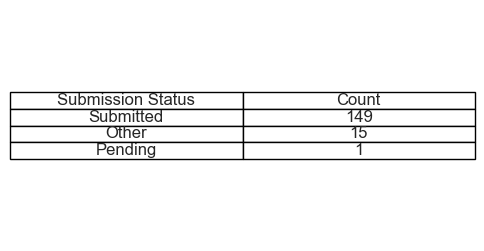

In [298]:
# Create a table of submission status counts
submission_status_table2020 = pendata_2020['submission_status'].value_counts().reset_index()
submission_status_table2020.columns = ['Submission Status', 'Count']

# Display the table with borders
fig, ax = plt.subplots(figsize=(6, 3))
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=submission_status_table2020.values, colLabels=submission_status_table2020.columns, loc='center', cellLoc='center')

# Add borders around the table
for (i, j), cell in table.get_celld().items():
    cell.set_edgecolor('black')  # Set the border color
    cell.set_linewidth(1)        # Set the border thickness
plt.show()



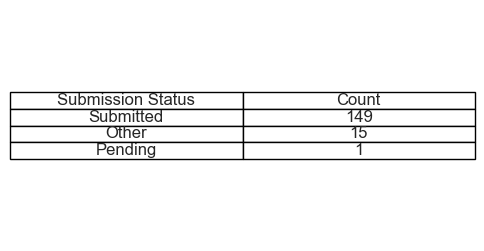

In [299]:
# Display the table with borders
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(6, 3))
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=submission_status_table2020.values, colLabels=submission_status_table2020.columns, loc='center', cellLoc='center')

# Add borders around the table
for (i, j), cell in table.get_celld().items():
    cell.set_edgecolor('black')  # Set the border color
    cell.set_linewidth(1)        # Set the border thickness
plt.show()


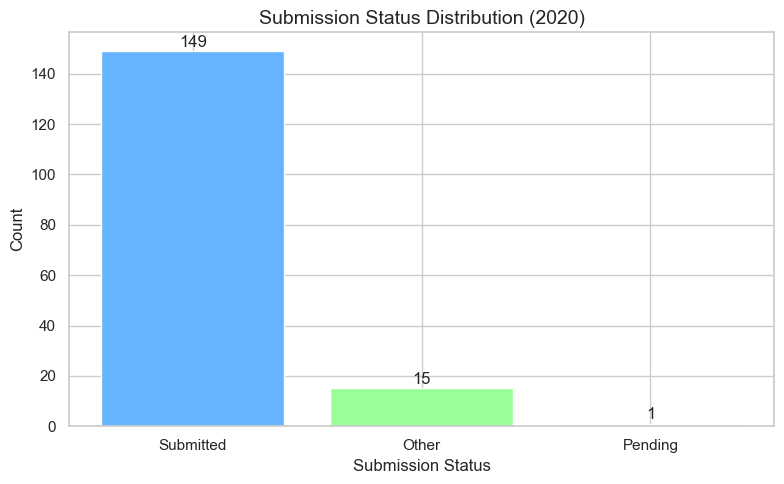

In [300]:
# Bar chart with different colors and count labels
colors = ['#66b3ff', '#99ff99', '#ffcc99']  # Define different colors for each bar
fig, ax = plt.subplots(figsize=(8, 5))

# Plot the bar chart with custom colors
bars = ax.bar(submission_status_table2020['Submission Status'], submission_status_table2020['Count'], color=colors)

# Add title and labels
ax.set_title('Submission Status Distribution (2020)', fontsize=14)
ax.set_xlabel('Submission Status', fontsize=12)
ax.set_ylabel('Count', fontsize=12)

# Add count labels on the bars
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval + 0.5, str(int(yval)), ha='center', va='bottom', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


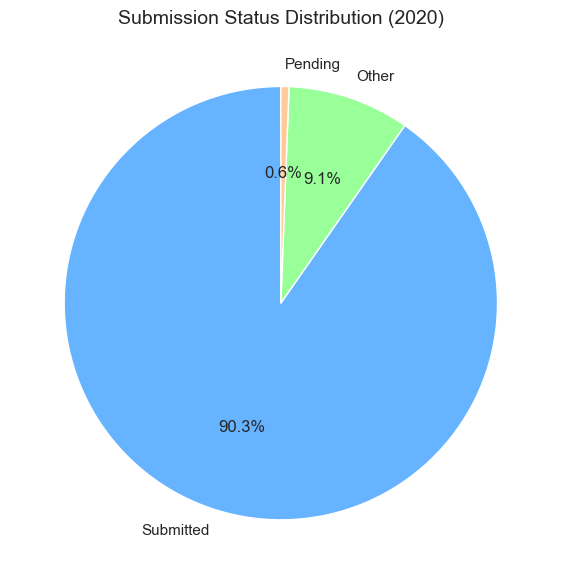

In [301]:
# Pie chart
plt.figure(figsize=(6, 6))
pendata_2020['submission_status'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['#66b3ff', '#99ff99', '#ffcc99'], startangle=90)
plt.title('Submission Status Distribution (2020)', fontsize=14)
plt.ylabel('')  # Remove the ylabel
plt.tight_layout()
plt.show()


In [302]:
# Classify the assessment status in 2020
pendata_2020['assessment_status_category'] = pendata_2020['assessment_sts'].apply(
    lambda x: 'Assessed' if x == 'Done' else ('Pending' if x == 'Pending' else 'Other')
)

# Perform counts for assessment status categories in 2020
assessment_status_table_2020 = pendata_2020['assessment_status_category'].value_counts().reset_index()
assessment_status_table_2020.columns = ['Assessment Status', 'Count']

# Display the table with borders
assementstatusstyled_table2020 = assessment_status_table_2020.style.set_table_styles(
    [{'selector': 'table', 'props': [('border', '2px solid black')]}, 
     {'selector': 'th', 'props': [('border', '2px solid black')]}, 
     {'selector': 'td', 'props': [('border', '2px solid black')]}]
)

# Display the styled table
assementstatusstyled_table2020


C:\Users\ichingeya\AppData\Local\Temp\ipykernel_18964\3425905949.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pendata_2020['assessment_status_category'] = pendata_2020['assessment_sts'].apply(


,Assessment Status,Count
0,Assessed,149
1,Pending,16


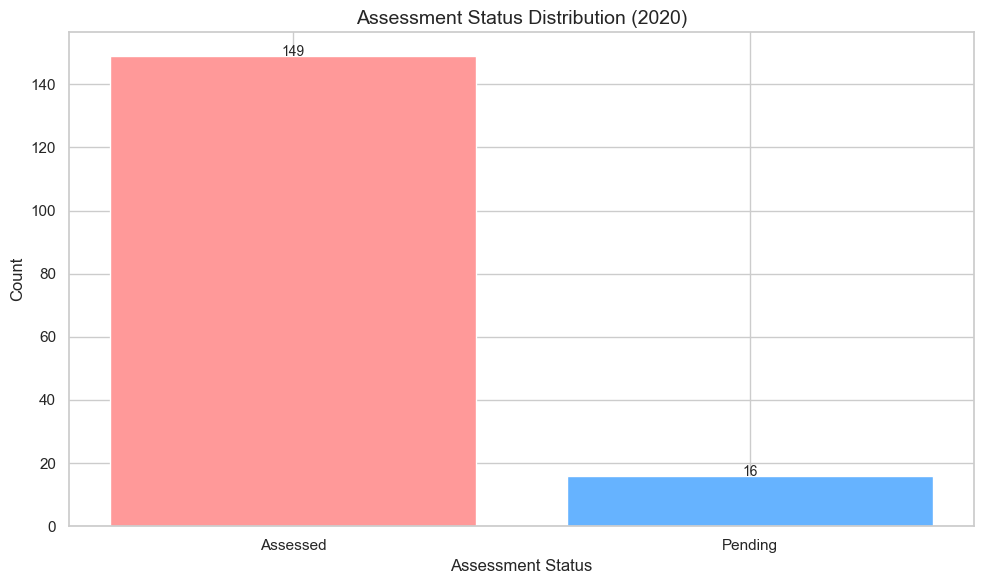

In [303]:
# Get the counts for each assessment status category
assessment_status_counts_2020 = pendata_2020['assessment_status_category'].value_counts()

# Plotting the bar chart for assessment status distribution
plt.figure(figsize=(10, 6))
bars = plt.bar(assessment_status_counts_2020.index, assessment_status_counts_2020.values, color=['#ff9999', '#66b3ff', '#99ff99'])

# Adding title and labels
plt.title('Assessment Status Distribution (2020)', fontsize=14)
plt.xlabel('Assessment Status', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Adding the count numbers on top of the bars
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.05, 
             f'{int(bar.get_height())}', ha='center', fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()


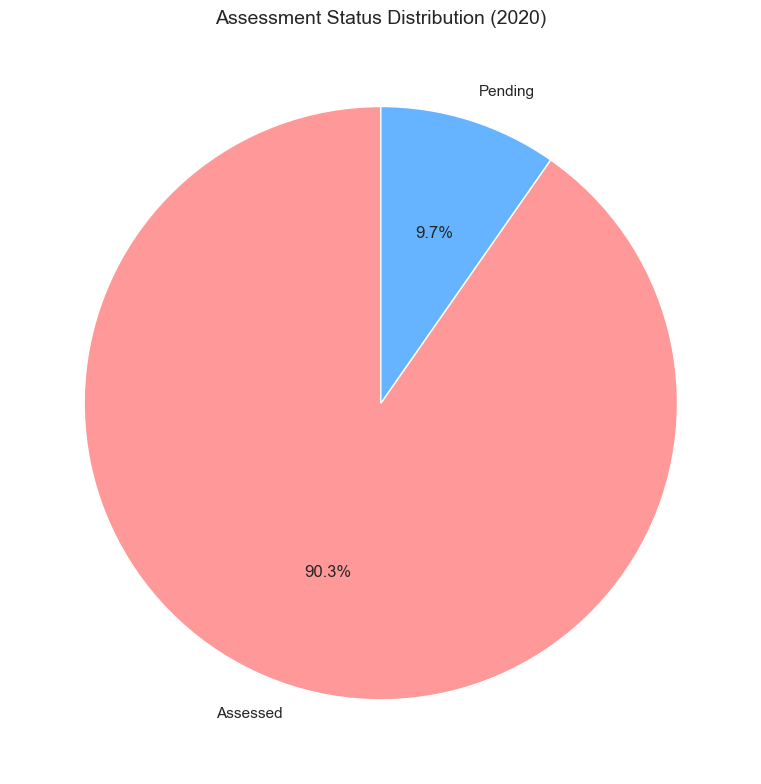

In [304]:
# Plotting the pie chart for assessment status distribution
plt.figure(figsize=(8, 8))
plt.pie(assessment_status_counts_2020, labels=assessment_status_counts_2020.index, autopct='%1.1f%%', 
        startangle=90, colors=['#ff9999', '#66b3ff', '#99ff99'])

# Adding title
plt.title('Assessment Status Distribution (2020)', fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()


In [305]:
# Count the occurrences of each report location
report_location_counts2020 = pendata_2020['report_location'].value_counts().reset_index()

# Rename the columns for clarity
report_location_counts2020.columns = ['Report Location', 'Count']

# Display the result
print(report_location_counts2020)

# Apply border styling to the report location count table
reportlocationstyled_table2020 = report_location_counts2020.style.set_table_styles(
    [{'selector': 'table', 'props': [('border', '2px solid black')]}, 
     {'selector': 'th', 'props': [('border', '2px solid black')]}, 
     {'selector': 'td', 'props': [('border', '2px solid black')]}]
)

# Display the styled table
reportlocationstyled_table2020


   Report Location  Count
0    Not Populated    161
1          MANAGER      2
2  CORE DEPARTMENT      1
3               PA      1


,Report Location,Count
0,Not Populated,161
1,MANAGER,2
2,CORE DEPARTMENT,1
3,PA,1


In [306]:
# Count the occurrences of each report location
report_location_counts2020 = pendata_2020['report_location'].value_counts().reset_index()

# Rename the columns for clarity
report_location_counts2020.columns = ['Report Location', 'Count']

# Display the result
print(report_location_counts2020)

# Apply border styling to the report location count table
reportlocationstyled_table2020 = report_location_counts2020.style.set_table_styles(
    [{'selector': 'table', 'props': [('border', '2px solid black')]}, 
     {'selector': 'th', 'props': [('border', '2px solid black')]}, 
     {'selector': 'td', 'props': [('border', '2px solid black')]}]
)

# Display the styled table
reportlocationstyled_table2020


   Report Location  Count
0    Not Populated    161
1          MANAGER      2
2  CORE DEPARTMENT      1
3               PA      1


,Report Location,Count
0,Not Populated,161
1,MANAGER,2
2,CORE DEPARTMENT,1
3,PA,1


In [307]:
# Create a new column for approval status categories based on the given criteria
def categorize_approval_status(status):
    if status == 'Yes':
        return 'Approved'
    elif status == 'pending':
        return 'Pending'
    elif status == 'No':
        return 'Non-approved'
    else:
        return 'Not populated'

# Apply the categorization function to the approval status column
pendata_2020['approval_status_category'] = pendata_2020['approval_sts'].apply(categorize_approval_status)

# Count the occurrences of each approval status category
approval_status_counts2020 = pendata_2020['approval_status_category'].value_counts().reset_index()
approval_status_counts2020.columns = ['Approval Status', 'Count']

# Display the result
print(approval_status_counts2020)

# Apply border styling to the approval status count table
styled_approval_status_table2020 = approval_status_counts2020.style.set_table_styles(
    [{'selector': 'table', 'props': [('border', '2px solid black')]}, 
     {'selector': 'th', 'props': [('border', '2px solid black')]}, 
     {'selector': 'td', 'props': [('border', '2px solid black')]}]
)

# Display the styled table
styled_approval_status_table2020


  Approval Status  Count
0        Approved    131
1   Not populated     32
2         Pending      2


C:\Users\ichingeya\AppData\Local\Temp\ipykernel_18964\2448266901.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pendata_2020['approval_status_category'] = pendata_2020['approval_sts'].apply(categorize_approval_status)


,Approval Status,Count
0,Approved,131
1,Not populated,32
2,Pending,2


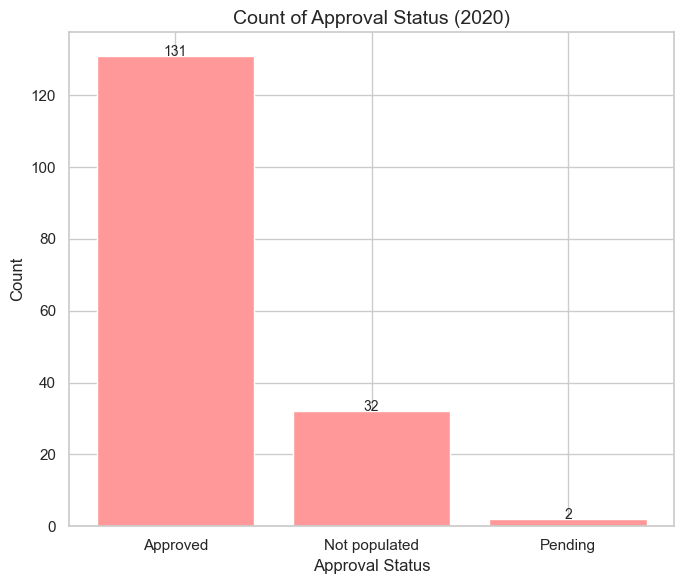

In [308]:
# Plotting the bar chart for approval status categories
plt.figure(figsize=(7, 6))
bars = plt.bar(approval_status_counts2020['Approval Status'], approval_status_counts2020['Count'], color='#ff9999')

# Adding title and labels
plt.title('Count of Approval Status (2020)', fontsize=14)
plt.xlabel('Approval Status', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Adding the count numbers on top of the bars
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.05, 
             f'{int(bar.get_height())}', ha='center', fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()


In [309]:
# Loop through each column to handle NaN replacement
for col in pendata_combined.columns:
    # Check if the column can be converted to numeric
    if pd.api.types.is_numeric_dtype(pendata_combined[col]):
        # Fill NaN in numeric columns with 0
        pendata_combined[col].fillna(0, inplace=True)
    else:
        # Fill NaN in non-numeric columns with 'Not Populated'
        pendata_combined[col].fillna('Not Populated', inplace=True)


C:\Users\ichingeya\AppData\Local\Temp\ipykernel_18964\594604888.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  pendata_combined[col].fillna(0, inplace=True)
C:\Users\ichingeya\AppData\Local\Temp\ipykernel_18964\594604888.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For 

In [310]:
pendata_combined.loc[pendata_combined.year == 2021]


,name_of_fund,submission_sts_,assessment_sts,approval_sts,year,sts,responsible_person,report_location,reason_for_not_approving,missing_resolution,...,supervisory_letter_sent_yes_no_exemption_dissolution,conditional_approval_to_proceed,verification_satus,director_review,director_review_reminder,modified_by,principal_analyst,missing_documents_,item_type,path
347,African Associated Mines,Done,Done,pending,2021.0,Active Fund,Marshall Kadiki,Not Populated,Not Populated,0.0,...,Not Populated,Not Populated,Not Populated,Not Populated,Not Populated,Best T. Mabhugu,Not Populated,0.0,Item,sites/ActuarialTeam/Lists/Pensions Guidance Pa...
348,African Banking Corporation Zimbabwe,Done,Done,Yes,2021.0,Active Fund,Not Populated,Not Populated,Not Populated,0.0,...,Not Populated,Not Populated,Not Populated,Not Populated,Not Populated,Isheanesu Chingeya,Not Populated,0.0,Item,sites/ActuarialTeam/Lists/Pensions Guidance Pa...
349,African Distillers,Done,Done,yes,2021.0,Active Fund,Not Populated,Not Populated,Not Populated,0.0,...,Not Populated,Not Populated,Not Populated,Not Populated,Not Populated,Isheanesu Chingeya,Not Populated,0.0,Item,sites/ActuarialTeam/Lists/Pensions Guidance Pa...
350,Agribank,Done,Done,yes,2021.0,Active Fund,Not Populated,Not Populated,Not Populated,0.0,...,Not Populated,Not Populated,Not Populated,Not Populated,Not Populated,Isheanesu Chingeya,Not Populated,0.0,Item,sites/ActuarialTeam/Lists/Pensions Guidance Pa...
351,Allied Timbers Holdings,Done,Done,yes,2021.0,Active Fund,Not Populated,Not Populated,Not Populated,0.0,...,Not Populated,Not Populated,Not Populated,Not Populated,Not Populated,Isheanesu Chingeya,Not Populated,0.0,Item,sites/ActuarialTeam/Lists/Pensions Guidance Pa...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
513,DENDAIRY,Other,Not Populated,Not Populated,2021.0,Active Fund,Not Populated,Not Populated,Not Populated,0.0,...,Not Populated,Not Populated,Not Populated,Not Populated,Not Populated,Isheanesu Chingeya,Not Populated,0.0,Item,sites/ActuarialTeam/Lists/Pensions Guidance Pa...
514,Pentact,Other,Not Populated,Not Populated,2021.0,Active Fund,Not Populated,Not Populated,Not Populated,0.0,...,Not Populated,Not Populated,Not Populated,Not Populated,Not Populated,Isheanesu Chingeya,Not Populated,0.0,Item,sites/ActuarialTeam/Lists/Pensions Guidance Pa...
515,Zimleaf,Dissolution,Not Populated,Not Populated,2021.0,Active Fund,Not Populated,Not Populated,Not Populated,0.0,...,Not Populated,Not Populated,Not Populated,Not Populated,Not Populated,Isheanesu Chingeya,Not Populated,0.0,Item,sites/ActuarialTeam/Lists/Pensions Guidance Pa...
863,BAZ,Pending,Not Populated,Not Populated,2021.0,Active Fund,Not Populated,Not Populated,Not Populated,0.0,...,Not Populated,Not Populated,Not Populated,Not Populated,Not Populated,Best T. Mabhugu,Not Populated,0.0,Item,sites/ActuarialTeam/Lists/Pensions Guidance Pa...


In [311]:
# Filter data for 2021
pendata_2021 = pendata_combined[pendata_combined['year'] == 2021]


In [312]:
# Map the submission statuses to new categories
pendata_2021['submission_status'] = pendata_2021['submission_sts_'].apply(
    lambda x: 'Assessed' if x == 'Done' else ('Pending' if x == 'Pending' else 'Other')
)

# Create a table of submission status counts
submission_status_table2021 = pendata_2021['submission_status'].value_counts().reset_index()
submission_status_table2021.columns = ['Submission Status', 'Count']
print(submission_status_table2021)


  Submission Status  Count
0          Assessed    149
1             Other     15
2           Pending      6


C:\Users\ichingeya\AppData\Local\Temp\ipykernel_18964\4046778606.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pendata_2021['submission_status'] = pendata_2021['submission_sts_'].apply(


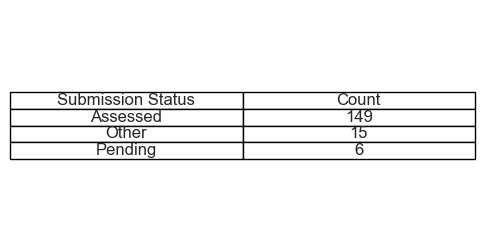

In [313]:
# Display the table with borders
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(6, 3))
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=submission_status_table2021.values, colLabels=submission_status_table2021.columns, loc='center', cellLoc='center')

# Add borders around the table
for (i, j), cell in table.get_celld().items():
    cell.set_edgecolor('black')  # Set the border color
    cell.set_linewidth(1)        # Set the border thickness
plt.show()


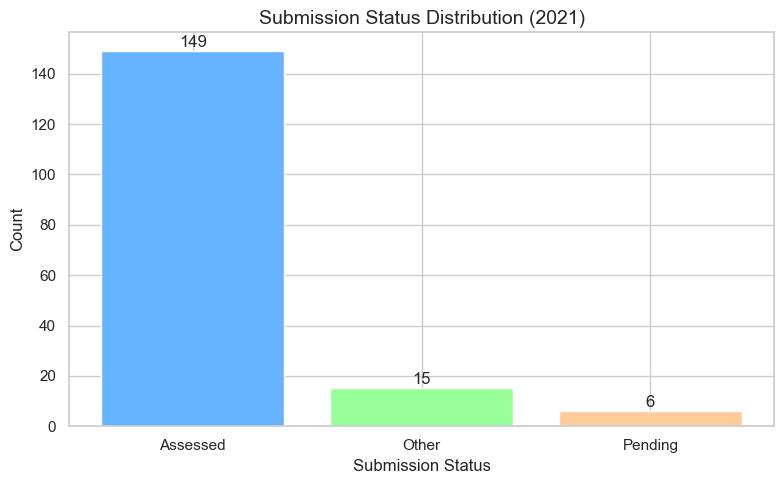

In [314]:
# Bar chart with different colors and count labels
colors = ['#66b3ff', '#99ff99', '#ffcc99']  # Define different colors for each bar
fig, ax = plt.subplots(figsize=(8, 5))

# Plot the bar chart with custom colors
bars = ax.bar(submission_status_table2021['Submission Status'], submission_status_table2021['Count'], color=colors)

# Add title and labels
ax.set_title('Submission Status Distribution (2021)', fontsize=14)
ax.set_xlabel('Submission Status', fontsize=12)
ax.set_ylabel('Count', fontsize=12)

# Add count labels on the bars
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval + 0.5, str(int(yval)), ha='center', va='bottom', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


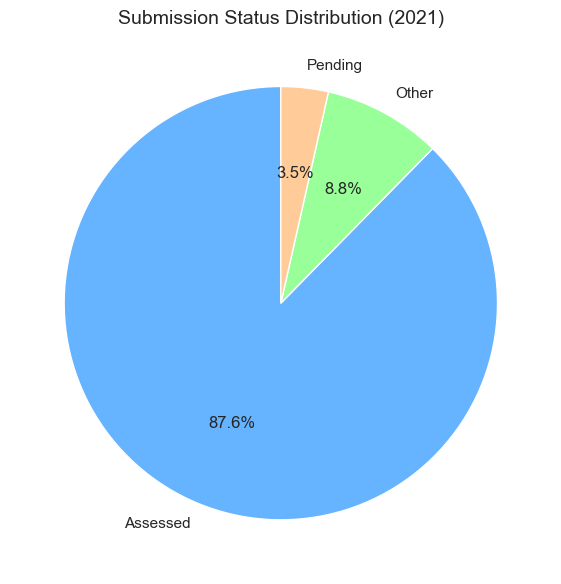

In [315]:
# Pie chart
plt.figure(figsize=(6, 6))
pendata_2021['submission_status'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['#66b3ff', '#99ff99', '#ffcc99'], startangle=90)
plt.title('Submission Status Distribution (2021)', fontsize=14)
plt.ylabel('')  # Remove the ylabel
plt.tight_layout()
plt.show()


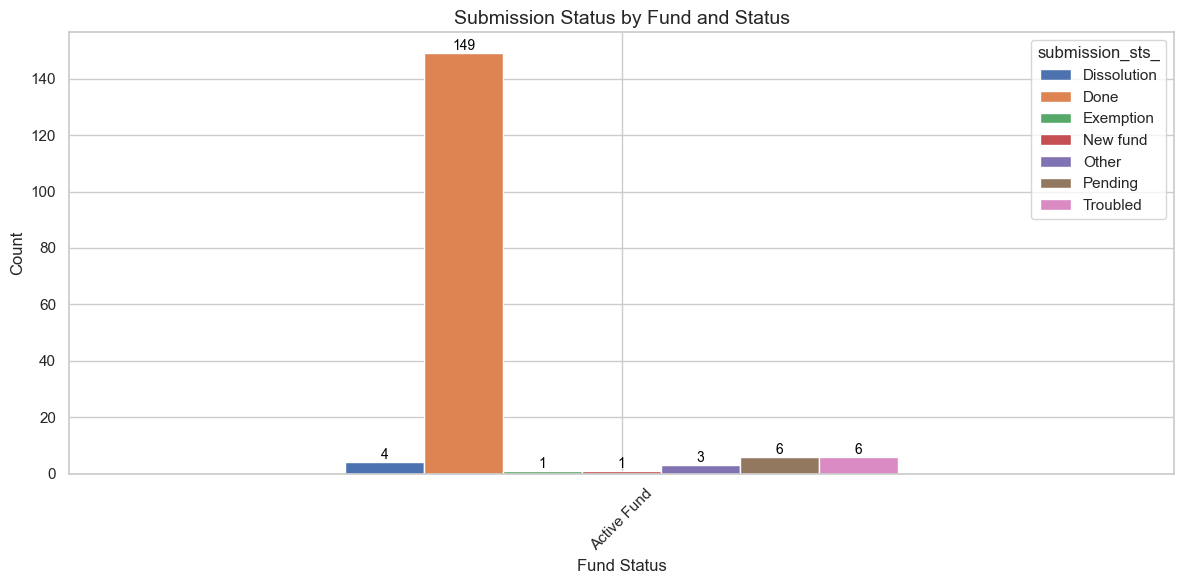

In [316]:
# Group by 'name_of_fund', 'sts' and 'submission_sts_', then unstack to reshape for the bar chart
fund_status_submission2021 = pendata_2021.groupby([ 'sts', 'submission_sts_']).size().unstack().fillna(0)

# Plotting a bar chart (not stacked)
ax = fund_status_submission2021.plot(kind='bar', figsize=(12, 6))

# Set the title and labels
plt.title('Submission Status by Fund and Status', fontsize=14)
plt.xlabel('Fund Status', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add count numbers on top of the bars
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=10, color='black')

# Show the plot
plt.tight_layout()  # Adjust layout for better spacing
plt.show()


In [317]:
# Classify the assessment status in 2021
pendata_2021['assessment_status_category'] = pendata_2021['assessment_sts'].apply(
    lambda x: 'Assessed' if x == 'Done' else ('Non-Assessed' if x == 'Pending' else 'Other')
)

# Perform counts for assessment status categories in 2021
assessment_status_table_2021 = pendata_2021['assessment_status_category'].value_counts().reset_index()
assessment_status_table_2021.columns = ['Assessment Status', 'Count']

# Display the table with borders
assementstatusstyled_table2021 = assessment_status_table_2021.style.set_table_styles(
    [{'selector': 'table', 'props': [('border', '2px solid black')]}, 
     {'selector': 'th', 'props': [('border', '2px solid black')]}, 
     {'selector': 'td', 'props': [('border', '2px solid black')]}]
)

# Display the styled table
assementstatusstyled_table2021


C:\Users\ichingeya\AppData\Local\Temp\ipykernel_18964\2960534519.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pendata_2021['assessment_status_category'] = pendata_2021['assessment_sts'].apply(


,Assessment Status,Count
0,Assessed,148
1,Other,22


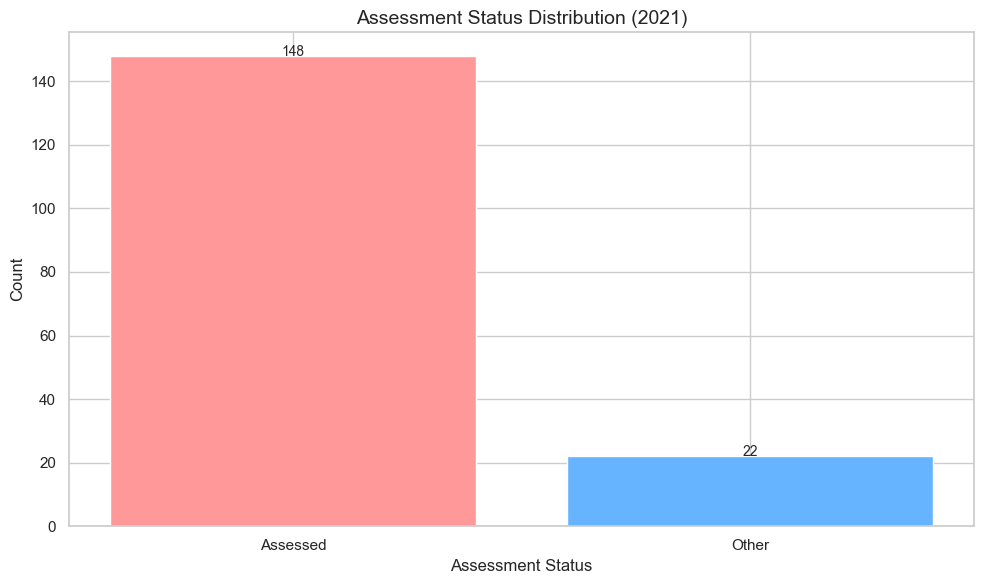

In [318]:
# Get the counts for each assessment status category
assessment_status_counts_2021 = pendata_2021['assessment_status_category'].value_counts()

# Plotting the bar chart for assessment status distribution
plt.figure(figsize=(10, 6))
bars = plt.bar(assessment_status_counts_2021.index, assessment_status_counts_2021.values, color=['#ff9999', '#66b3ff', '#99ff99'])

# Adding title and labels
plt.title('Assessment Status Distribution (2021)', fontsize=14)
plt.xlabel('Assessment Status', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Adding the count numbers on top of the bars
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.05, 
             f'{int(bar.get_height())}', ha='center', fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()


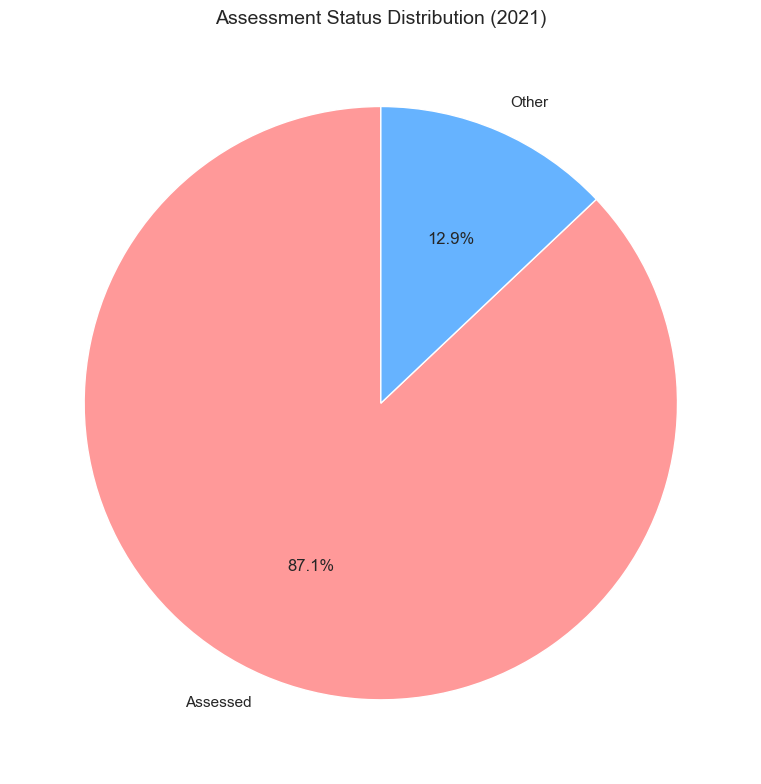

In [319]:
# Plotting the pie chart for assessment status distribution
plt.figure(figsize=(8, 8))
plt.pie(assessment_status_counts_2021, labels=assessment_status_counts_2021.index, autopct='%1.1f%%', 
        startangle=90, colors=['#ff9999', '#66b3ff', '#99ff99'])

# Adding title
plt.title('Assessment Status Distribution (2021)', fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()


In [320]:
# Count the occurrences of each report location
report_location_counts2021 = pendata_2021['report_location'].value_counts().reset_index()

# Rename the columns for clarity
report_location_counts2021.columns = ['Report Location', 'Count']

# Display the result
print(report_location_counts2021)

# Apply border styling to the report location count table
reportlocationstyled_table2021 = report_location_counts2021.style.set_table_styles(
    [{'selector': 'table', 'props': [('border', '2px solid black')]}, 
     {'selector': 'th', 'props': [('border', '2px solid black')]}, 
     {'selector': 'td', 'props': [('border', '2px solid black')]}]
)

# Display the styled table
reportlocationstyled_table2021


   Report Location  Count
0    Not Populated    165
1          MANAGER      3
2  CORE DEPARTMENT      2


,Report Location,Count
0,Not Populated,165
1,MANAGER,3
2,CORE DEPARTMENT,2


In [321]:
# Create a new column for approval status categories based on the given criteria
def categorize_approval_status(status):
    if status == 'Yes':
        return 'Approved'
    elif status == 'Pending':
        return 'Non-approved'
    else:
        return 'Not yet assessed'

# Apply the categorization function to the approval status column
pendata_2021['approval_status_category'] = pendata_2021['approval_sts'].apply(categorize_approval_status)

# Count the occurrences of each approval status category
approval_status_counts2021 = pendata_2021['approval_status_category'].value_counts().reset_index()
approval_status_counts2021.columns = ['Approval Status', 'Count']

# Display the result
print(approval_status_counts2021)

# Apply border styling to the approval status count table
styled_approval_status_table2021 = approval_status_counts2021.style.set_table_styles(
    [{'selector': 'table', 'props': [('border', '2px solid black')]}, 
     {'selector': 'th', 'props': [('border', '2px solid black')]}, 
     {'selector': 'td', 'props': [('border', '2px solid black')]}]
)

# Display the styled table
styled_approval_status_table2021


    Approval Status  Count
0  Not yet assessed    110
1          Approved     59
2      Non-approved      1


C:\Users\ichingeya\AppData\Local\Temp\ipykernel_18964\1348192127.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pendata_2021['approval_status_category'] = pendata_2021['approval_sts'].apply(categorize_approval_status)


,Approval Status,Count
0,Not yet assessed,110
1,Approved,59
2,Non-approved,1


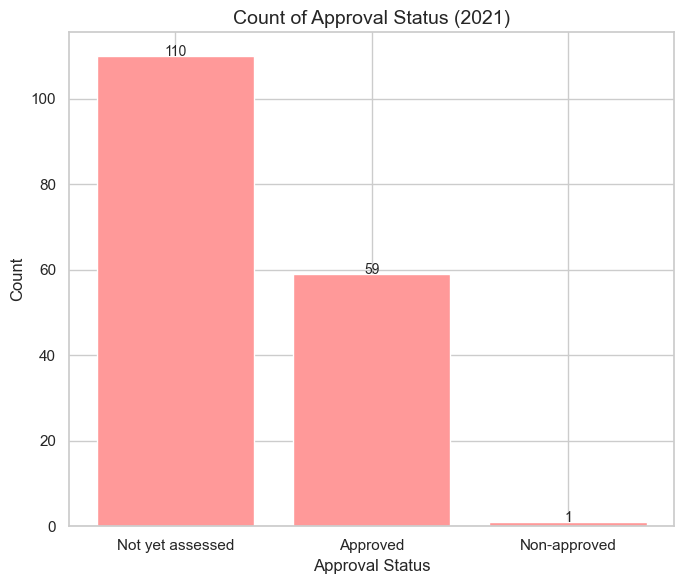

In [322]:
# Plotting the bar chart for approval status categories
plt.figure(figsize=(7, 6))
bars = plt.bar(approval_status_counts2021['Approval Status'], approval_status_counts2021['Count'], color='#ff9999')

# Adding title and labels
plt.title('Count of Approval Status (2021)', fontsize=14)
plt.xlabel('Approval Status', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Adding the count numbers on top of the bars
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.05, 
             f'{int(bar.get_height())}', ha='center', fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()


In [323]:
#2022 2022 2022 2022 2022 2022 2022 2022 2022 2022 2022 2022 2022 2022 

In [324]:
# Loop through each column to handle NaN replacement
for col in pendata_combined.columns:
    # Check if the column can be converted to numeric
    if pd.api.types.is_numeric_dtype(pendata_combined[col]):
        # Fill NaN in numeric columns with 0
        pendata_combined[col].fillna(0, inplace=True)
    else:
        # Fill NaN in non-numeric columns with 'Not Populated'
        pendata_combined[col].fillna('Not Populated', inplace=True)


C:\Users\ichingeya\AppData\Local\Temp\ipykernel_18964\594604888.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  pendata_combined[col].fillna(0, inplace=True)
C:\Users\ichingeya\AppData\Local\Temp\ipykernel_18964\594604888.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For 

In [325]:
pendata_combined.loc[pendata_combined.year == 2022]


,name_of_fund,submission_sts_,assessment_sts,approval_sts,year,sts,responsible_person,report_location,reason_for_not_approving,missing_resolution,...,supervisory_letter_sent_yes_no_exemption_dissolution,conditional_approval_to_proceed,verification_satus,director_review,director_review_reminder,modified_by,principal_analyst,missing_documents_,item_type,path
516,Catering Industry Pension Fund,Pending,Pending,pending,2022.0,Active Fund,Mubatsiri Mukome,Not Populated,Not Populated,0.0,...,Not Populated,Not Populated,Not Populated,Not Populated,Not Populated,Best T. Mabhugu,Not Populated,0.0,Item,sites/ActuarialTeam/Lists/Pensions Guidance Pa...
517,FUNDO PENSION FUND,Pending,Pending,Not Populated,2022.0,Active Fund,Not Populated,Not Populated,Not Populated,0.0,...,Not Populated,Not Populated,Not Populated,Not Populated,Not Populated,Mqhele B. Ncube,Not Populated,0.0,Item,sites/ActuarialTeam/Lists/Pensions Guidance Pa...
518,WHITESTONE SCHOOL TRUST,Done,Done,Yes,2022.0,Active Fund,Not Populated,CORE DEPARTMENT,Not Populated,0.0,...,Not Populated,Not Populated,Not Populated,Not Populated,Not Populated,Best T. Mabhugu,Not Populated,0.0,Item,sites/ActuarialTeam/Lists/Pensions Guidance Pa...
519,Motor Industry,Done,Done,pending,2022.0,Active Fund,Not Populated,CORE DEPARTMENT,Not Populated,0.0,...,Not Populated,Not Populated,Not Populated,Not Populated,Not Populated,Best T. Mabhugu,Not Populated,0.0,Item,sites/ActuarialTeam/Lists/Pensions Guidance Pa...
520,Unicem-Actives,Done,Done,Yes,2022.0,Active Fund,Not Populated,CORE DEPARTMENT,Not Populated,0.0,...,Not Populated,Not Populated,Not Populated,Not Populated,Not Populated,Best T. Mabhugu,Not Populated,0.0,Item,sites/ActuarialTeam/Lists/Pensions Guidance Pa...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
684,Pension Multiplier Fund,Done,Done,pending,2022.0,Active Fund,Mubatsiri Mukome,MANAGER,Not Populated,0.0,...,Not Populated,Not Populated,Not Populated,Not Populated,Not Populated,Best T. Mabhugu,Not Populated,0.0,Item,sites/ActuarialTeam/Lists/Pensions Guidance Pa...
702,INVESCI,Done,Done,Yes,2022.0,Active Fund,Not Populated,CORE DEPARTMENT,Not Populated,0.0,...,Not Populated,Not Populated,Verified,Not Populated,Not Populated,Best T. Mabhugu,Not Populated,0.0,Item,sites/ActuarialTeam/Lists/Pensions Guidance Pa...
856,NATIONAL OIL INFRASTRUCTURE COMPANY OF ZIMBABWE,Done,Done,Yes,2022.0,Active Fund,Marvellous Muhodhi,CORE DEPARTMENT,Not Populated,0.0,...,Not Populated,Not Populated,Not Populated,Not Populated,Not Populated,Best T. Mabhugu,Not Populated,0.0,Item,sites/ActuarialTeam/Lists/Pensions Guidance Pa...
864,BAZ,Done,Done,pending,2022.0,Active Fund,Not Populated,PA,Not Populated,0.0,...,Not Populated,Not Populated,Not Populated,Not Populated,Not Populated,Best T. Mabhugu,Not Populated,0.0,Item,sites/ActuarialTeam/Lists/Pensions Guidance Pa...


In [326]:
pendata_combined.columns


Index(['name_of_fund', 'submission_sts_', 'assessment_sts', 'approval_sts',
       'year', 'sts', 'responsible_person', 'report_location',
       'reason_for_not_approving', 'missing_resolution', 'asset_split_diff',
       'prior_year_non_approved', 'bonus_issues', 'asset_quality', 'other',
       'date_assessment_report_sent_to_core_drpt',
       'date_supervisory_letter_sent_to_entity_by_core_drpt',
       'supervisory_letter_sent_yes_no_exemption_dissolution',
       'conditional_approval_to_proceed', 'verification_satus',
       'director_review', 'director_review_reminder', 'modified_by',
       'principal_analyst', 'missing_documents_', 'item_type', 'path'],
      dtype='object')

In [327]:
# Filter data for 2022
pendata_2022 = pendata_combined[pendata_combined['year'] == 2022]


In [328]:
# Map the submission statuses to new categories
pendata_2022['submission_status'] = pendata_2022['submission_sts_'].apply(
    lambda x: 'Submitted' if x == 'Done' else ('Partial' if x == 'Partial' else 'Pending')
)

# Create a table of submission status counts
submission_status_table2022 = pendata_2022['submission_status'].value_counts().reset_index()
submission_status_table2022.columns = ['Submission Status', 'Count']
print(submission_status_table2022)


  Submission Status  Count
0         Submitted    140
1           Pending     33


C:\Users\ichingeya\AppData\Local\Temp\ipykernel_18964\1613648540.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pendata_2022['submission_status'] = pendata_2022['submission_sts_'].apply(


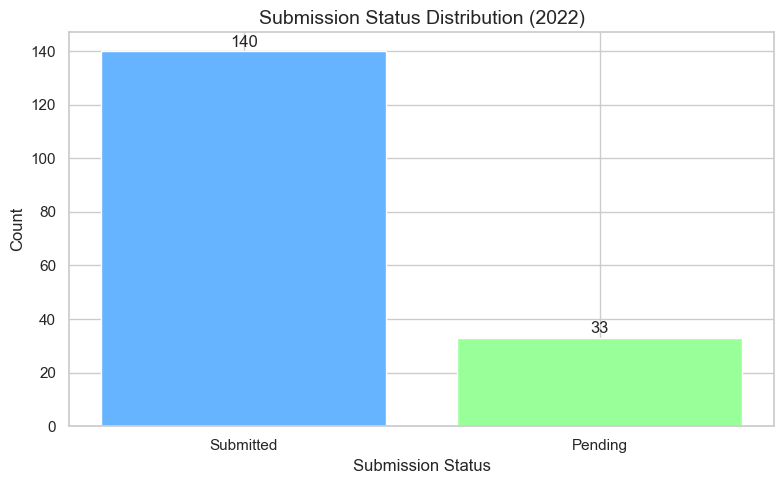

In [329]:
# Bar chart with different colors and count labels
colors = ['#66b3ff', '#99ff99', '#ffcc99']  # Define different colors for each bar
fig, ax = plt.subplots(figsize=(8, 5))

# Plot the bar chart with custom colors
bars = ax.bar(submission_status_table2022['Submission Status'], submission_status_table2022['Count'], color=colors)

# Add title and labels
ax.set_title('Submission Status Distribution (2022)', fontsize=14)
ax.set_xlabel('Submission Status', fontsize=12)
ax.set_ylabel('Count', fontsize=12)

# Add count labels on the bars
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval + 0.5, str(int(yval)), ha='center', va='bottom', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


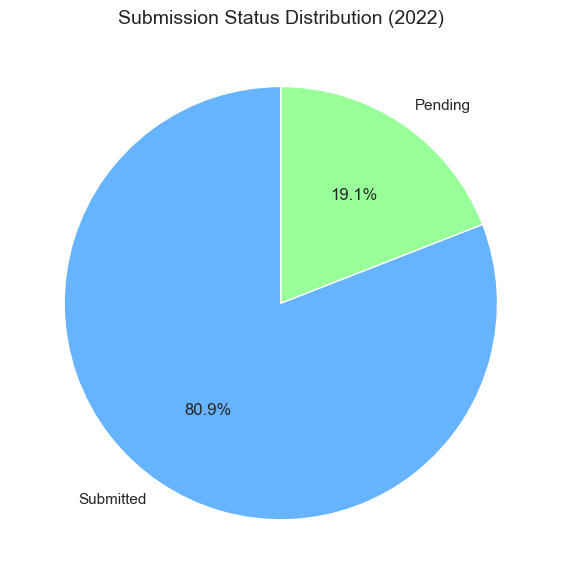

In [330]:
# Pie chart
plt.figure(figsize=(6, 6))
pendata_2022['submission_status'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['#66b3ff', '#99ff99', '#ffcc99'], startangle=90)
plt.title('Submission Status Distribution (2022)', fontsize=14)
plt.ylabel('')  # Remove the ylabel
plt.tight_layout()
plt.show()


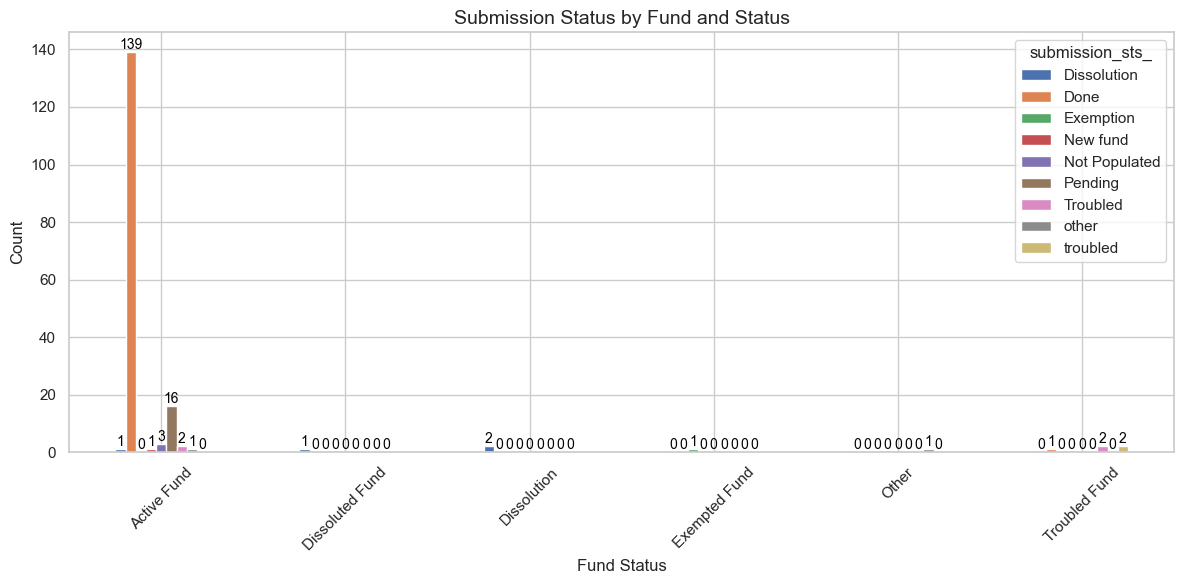

In [331]:
# Group by 'name_of_fund', 'sts' and 'submission_sts_', then unstack to reshape for the bar chart
fund_status_submission2022 = pendata_2022.groupby([ 'sts', 'submission_sts_']).size().unstack().fillna(0)

# Plotting a bar chart (not stacked)
ax = fund_status_submission2022.plot(kind='bar', figsize=(12, 6))

# Set the title and labels
plt.title('Submission Status by Fund and Status', fontsize=14)
plt.xlabel('Fund Status', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add count numbers on top of the bars
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=10, color='black')

# Show the plot
plt.tight_layout()  # Adjust layout for better spacing
plt.show()


In [332]:
# Classify the assessment status in 2022
pendata_2022['assessment_status_category'] = pendata_2022['assessment_sts'].apply(
    lambda x: 'Assessed' if x == 'Done' else ('Pending' if x == 'Pending' else 'Other')
)

# Perform counts for assessment status categories in 2022
assessment_status_table_2022 = pendata_2022['assessment_status_category'].value_counts().reset_index()
assessment_status_table_2022.columns = ['Assessment Status', 'Count']

# Display the table with borders
assementstatusstyled_table2022 = assessment_status_table_2022.style.set_table_styles(
    [{'selector': 'table', 'props': [('border', '2px solid black')]}, 
     {'selector': 'th', 'props': [('border', '2px solid black')]}, 
     {'selector': 'td', 'props': [('border', '2px solid black')]}]
)

# Display the styled table
assementstatusstyled_table2022


C:\Users\ichingeya\AppData\Local\Temp\ipykernel_18964\1369066771.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pendata_2022['assessment_status_category'] = pendata_2022['assessment_sts'].apply(


,Assessment Status,Count
0,Assessed,138
1,Other,19
2,Pending,16


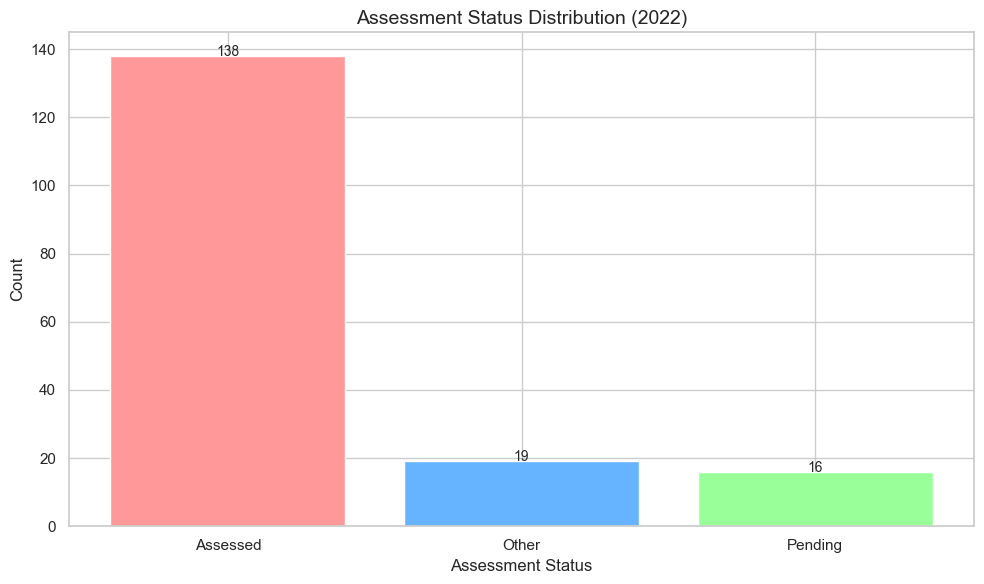

In [333]:
# Get the counts for each assessment status category
assessment_status_counts_2022 = pendata_2022['assessment_status_category'].value_counts()

# Plotting the bar chart for assessment status distribution
plt.figure(figsize=(10, 6))
bars = plt.bar(assessment_status_counts_2022.index, assessment_status_counts_2022.values, color=['#ff9999', '#66b3ff', '#99ff99'])

# Adding title and labels
plt.title('Assessment Status Distribution (2022)', fontsize=14)
plt.xlabel('Assessment Status', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Adding the count numbers on top of the bars
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.05, 
             f'{int(bar.get_height())}', ha='center', fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()


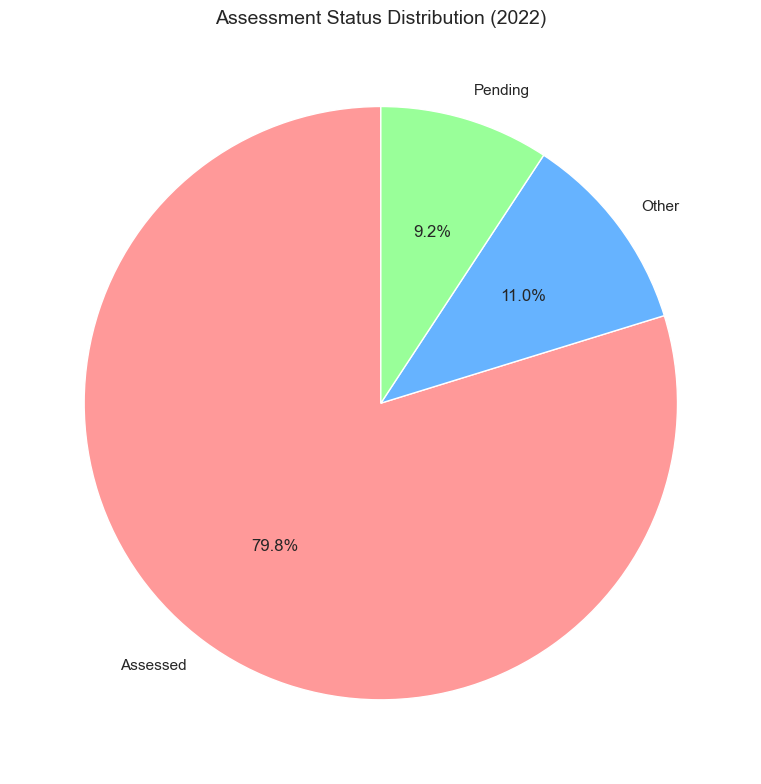

In [334]:
# Plotting the pie chart for assessment status distribution
plt.figure(figsize=(8, 8))
plt.pie(assessment_status_counts_2022, labels=assessment_status_counts_2022.index, autopct='%1.1f%%', 
        startangle=90, colors=['#ff9999', '#66b3ff', '#99ff99'])

# Adding title
plt.title('Assessment Status Distribution (2022)', fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()


In [335]:
# Count the occurrences of each report location
report_location_counts2022 = pendata_2022['report_location'].value_counts().reset_index()

# Rename the columns for clarity
report_location_counts2022.columns = ['Report Location', 'Count']

# Display the result
print(report_location_counts2022)

# Apply border styling to the report location count table
reportlocationstyled_table2022 = report_location_counts2022.style.set_table_styles(
    [{'selector': 'table', 'props': [('border', '2px solid black')]}, 
     {'selector': 'th', 'props': [('border', '2px solid black')]}, 
     {'selector': 'td', 'props': [('border', '2px solid black')]}]
)

# Display the styled table
reportlocationstyled_table2022


       Report Location  Count
0      CORE DEPARTMENT     94
1        Not Populated     49
2              MANAGER     12
3                   PA     11
4              ANALYST      3
5               Anayst      2
6  Responses Actuarial      1
7        supersvisory       1


,Report Location,Count
0,CORE DEPARTMENT,94
1,Not Populated,49
2,MANAGER,12
3,PA,11
4,ANALYST,3
5,Anayst,2
6,Responses Actuarial,1
7,supersvisory,1


In [336]:
# Create a new column for approval status categories based on the given criteria
def categorize_approval_status(status):
    if status == 'Yes':
        return 'Approved'
    elif status == 'pending':
        return 'pending'
    elif status == 'No':
        return 'non approval'
    else:
        return 'Not populated'

# Apply the categorization function to the approval status column
pendata_2022['approval_status_category'] = pendata_2022['approval_sts'].apply(categorize_approval_status)

# Count the occurrences of each approval status category
approval_status_counts2022 = pendata_2022['approval_status_category'].value_counts().reset_index()
approval_status_counts2022.columns = ['Approval Status', 'Count']

# Display the result
print(approval_status_counts2022)

# Apply border styling to the approval status count table
styled_approval_status_table2022 = approval_status_counts2022.style.set_table_styles(
    [{'selector': 'table', 'props': [('border', '2px solid black')]}, 
     {'selector': 'th', 'props': [('border', '2px solid black')]}, 
     {'selector': 'td', 'props': [('border', '2px solid black')]}]
)

# Display the styled table
styled_approval_status_table2022


  Approval Status  Count
0        Approved     92
1   Not populated     31
2         pending     29
3    non approval     21


C:\Users\ichingeya\AppData\Local\Temp\ipykernel_18964\1650035993.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pendata_2022['approval_status_category'] = pendata_2022['approval_sts'].apply(categorize_approval_status)


,Approval Status,Count
0,Approved,92
1,Not populated,31
2,pending,29
3,non approval,21


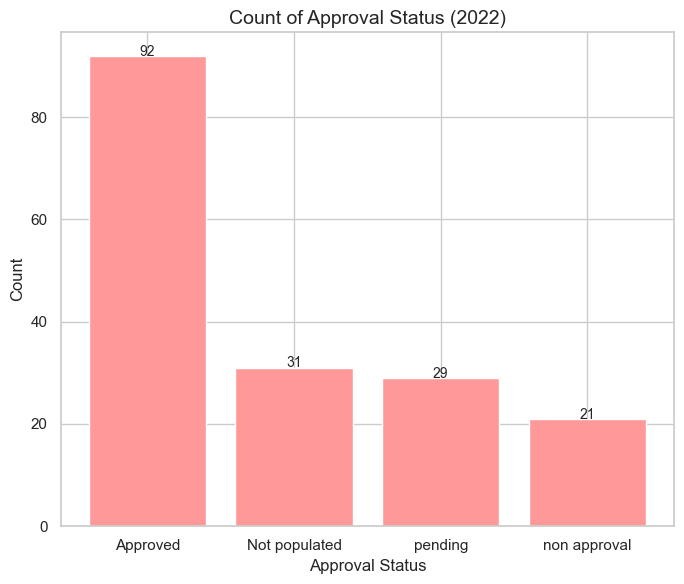

In [337]:
# Plotting the bar chart for approval status categories
plt.figure(figsize=(7, 6))
bars = plt.bar(approval_status_counts2022['Approval Status'], approval_status_counts2022['Count'], color='#ff9999')

# Adding title and labels
plt.title('Count of Approval Status (2022)', fontsize=14)
plt.xlabel('Approval Status', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Adding the count numbers on top of the bars
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.05, 
             f'{int(bar.get_height())}', ha='center', fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()


In [338]:
pendata_combined.loc[pendata_combined.year == 2023]


,name_of_fund,submission_sts_,assessment_sts,approval_sts,year,sts,responsible_person,report_location,reason_for_not_approving,missing_resolution,...,supervisory_letter_sent_yes_no_exemption_dissolution,conditional_approval_to_proceed,verification_satus,director_review,director_review_reminder,modified_by,principal_analyst,missing_documents_,item_type,path
685,Zesa Staff pension fund,Done,Done,Yes,2023.0,Active Fund,Marvellous Muhodhi,CORE DEPARTMENT,Not Populated,0.0,...,Not Populated,Not Populated,Verified,Not Populated,Not Populated,Mqhele B. Ncube,Not Populated,0.0,Item,sites/ActuarialTeam/Lists/Pensions Guidance Pa...
686,ZEIPF,Done,Done,Yes,2023.0,Active Fund,Marshall Kadiki,CORE DEPARTMENT,Not Populated,0.0,...,Not Populated,Not Populated,Not Populated,Not Populated,Not Populated,Mqhele B. Ncube,Not Populated,0.0,Item,sites/ActuarialTeam/Lists/Pensions Guidance Pa...
687,Construction industry pension fund,Done,Done,Yes,2023.0,Active Fund,Isheanesu Chingeya,CORE DEPARTMENT,Not Populated,0.0,...,Not Populated,Not Populated,Not Populated,Not Populated,Not Populated,Mqhele B. Ncube,Not Populated,0.0,Item,sites/ActuarialTeam/Lists/Pensions Guidance Pa...
688,Mining Industry Pension Fund,Done,Done,Yes,2023.0,Active Fund,Marshall Kadiki,CORE DEPARTMENT,Not Populated,0.0,...,Not Populated,Not Populated,Verified,Not Populated,Not Populated,Mqhele B. Ncube,Not Populated,0.0,Item,sites/ActuarialTeam/Lists/Pensions Guidance Pa...
689,Mega Pak Pension Fund,Done,Done,pending,2023.0,Active Fund,Marvellous Muhodhi,CORE DEPARTMENT,Not Populated,0.0,...,Not Populated,Not Populated,Not Populated,Not Populated,Not Populated,Mqhele B. Ncube,Not Populated,0.0,Item,sites/ActuarialTeam/Lists/Pensions Guidance Pa...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
854,Crown agents Provident fund,Done,Done,Yes,2023.0,Active Fund,Marshall Kadiki,CORE DEPARTMENT,Not Populated,0.0,...,Not Populated,Not Populated,Not Populated,Not Populated,Not Populated,Mqhele B. Ncube,Not Populated,0.0,Item,sites/ActuarialTeam/Lists/Pensions Guidance Pa...
855,National Railways of Zimbabwe,Done,Done,Yes,2023.0,Active Fund,Marshall Kadiki,CORE DEPARTMENT,Not Populated,0.0,...,Not Populated,Not Populated,Not Populated,Not Populated,Not Populated,Mqhele B. Ncube,Not Populated,0.0,Item,sites/ActuarialTeam/Lists/Pensions Guidance Pa...
857,INVESCI,Done,Done,pending,2023.0,Active Fund,Marvellous Muhodhi,CORE DEPARTMENT,Not Populated,0.0,...,Not Populated,Not Populated,Not Populated,Not Populated,Not Populated,Mqhele B. Ncube,Not Populated,0.0,Item,sites/ActuarialTeam/Lists/Pensions Guidance Pa...
860,BAZ,Done,Done,pending,2023.0,Active Fund,Best T. Mabhugu,CORE DEPARTMENT,Not Populated,0.0,...,Not Populated,Not Populated,Not Populated,Not Populated,Not Populated,Mqhele B. Ncube,Not Populated,0.0,Item,sites/ActuarialTeam/Lists/Pensions Guidance Pa...


In [339]:
pendata_combined.columns


Index(['name_of_fund', 'submission_sts_', 'assessment_sts', 'approval_sts',
       'year', 'sts', 'responsible_person', 'report_location',
       'reason_for_not_approving', 'missing_resolution', 'asset_split_diff',
       'prior_year_non_approved', 'bonus_issues', 'asset_quality', 'other',
       'date_assessment_report_sent_to_core_drpt',
       'date_supervisory_letter_sent_to_entity_by_core_drpt',
       'supervisory_letter_sent_yes_no_exemption_dissolution',
       'conditional_approval_to_proceed', 'verification_satus',
       'director_review', 'director_review_reminder', 'modified_by',
       'principal_analyst', 'missing_documents_', 'item_type', 'path'],
      dtype='object')

In [340]:
# Filter data for 2023
pendata_2023 = pendata_combined[pendata_combined['year'] == 2023]


In [341]:
# Map the submission statuses to new categories
pendata_2023['submission_status'] = pendata_2023['submission_sts_'].apply(
    lambda x: 'Submitted' if x == 'Done' else ('Partial' if x == 'Partial' else 'Pending')
)

# Create a table of submission status counts
submission_status_table2023 = pendata_2023['submission_status'].value_counts().reset_index()
submission_status_table2023.columns = ['Submission Status', 'Count']
print(submission_status_table2023)


  Submission Status  Count
0         Submitted    112
1           Pending     60
2           Partial      1


C:\Users\ichingeya\AppData\Local\Temp\ipykernel_18964\2791804666.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pendata_2023['submission_status'] = pendata_2023['submission_sts_'].apply(


In [342]:
# Map the submission statuses to new categories
pendata_2023['submission_status'] = pendata_2023['submission_sts_'].apply(
    lambda x: 'Submitted' if x == 'Done' else ('Partial' if x == 'Partial' else 'Pending')
)

# Create a table of submission status counts
submission_status_table2023 = pendata_2023['submission_status'].value_counts().reset_index()
submission_status_table2023.columns = ['Submission Status', 'Count']
print(submission_status_table2023)


  Submission Status  Count
0         Submitted    112
1           Pending     60
2           Partial      1


C:\Users\ichingeya\AppData\Local\Temp\ipykernel_18964\2791804666.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pendata_2023['submission_status'] = pendata_2023['submission_sts_'].apply(


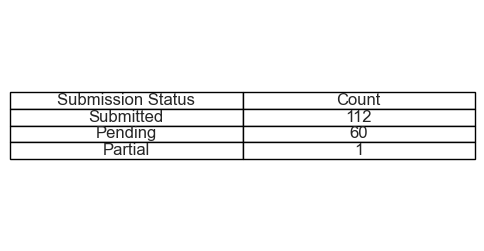

In [343]:
# Display the table with borders
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(6, 3))
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=submission_status_table2023.values, colLabels=submission_status_table2023.columns, loc='center', cellLoc='center')

# Add borders around the table
for (i, j), cell in table.get_celld().items():
    cell.set_edgecolor('black')  # Set the border color
    cell.set_linewidth(1)        # Set the border thickness
plt.show()


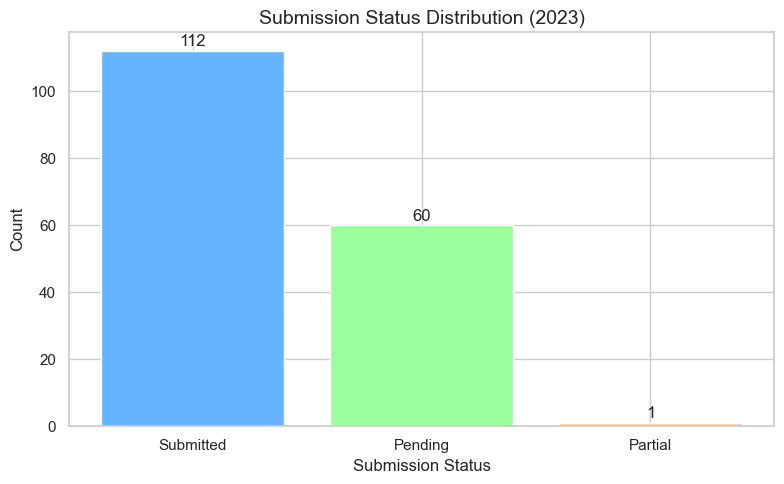

In [344]:
# Bar chart with different colors and count labels
colors = ['#66b3ff', '#99ff99', '#ffcc99']  # Define different colors for each bar
fig, ax = plt.subplots(figsize=(8, 5))

# Plot the bar chart with custom colors
bars = ax.bar(submission_status_table2023['Submission Status'], submission_status_table2023['Count'], color=colors)

# Add title and labels
ax.set_title('Submission Status Distribution (2023)', fontsize=14)
ax.set_xlabel('Submission Status', fontsize=12)
ax.set_ylabel('Count', fontsize=12)

# Add count labels on the bars
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval + 0.5, str(int(yval)), ha='center', va='bottom', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


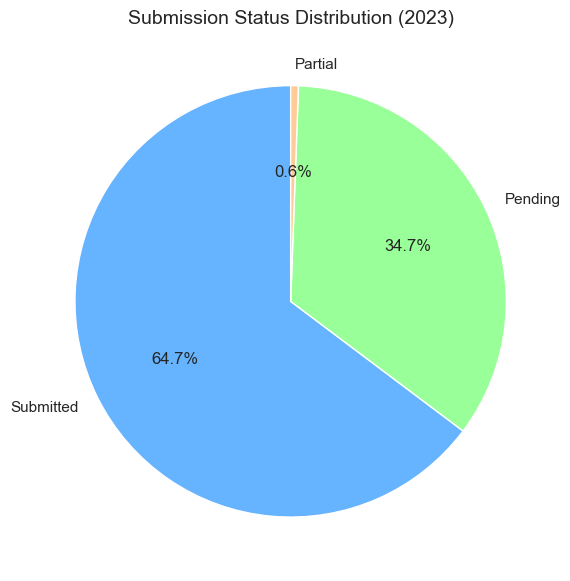

In [345]:
# Pie chart
plt.figure(figsize=(6, 6))
pendata_2023['submission_status'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['#66b3ff', '#99ff99', '#ffcc99'], startangle=90)
plt.title('Submission Status Distribution (2023)', fontsize=14)
plt.ylabel('')  # Remove the ylabel
plt.tight_layout()
plt.show()


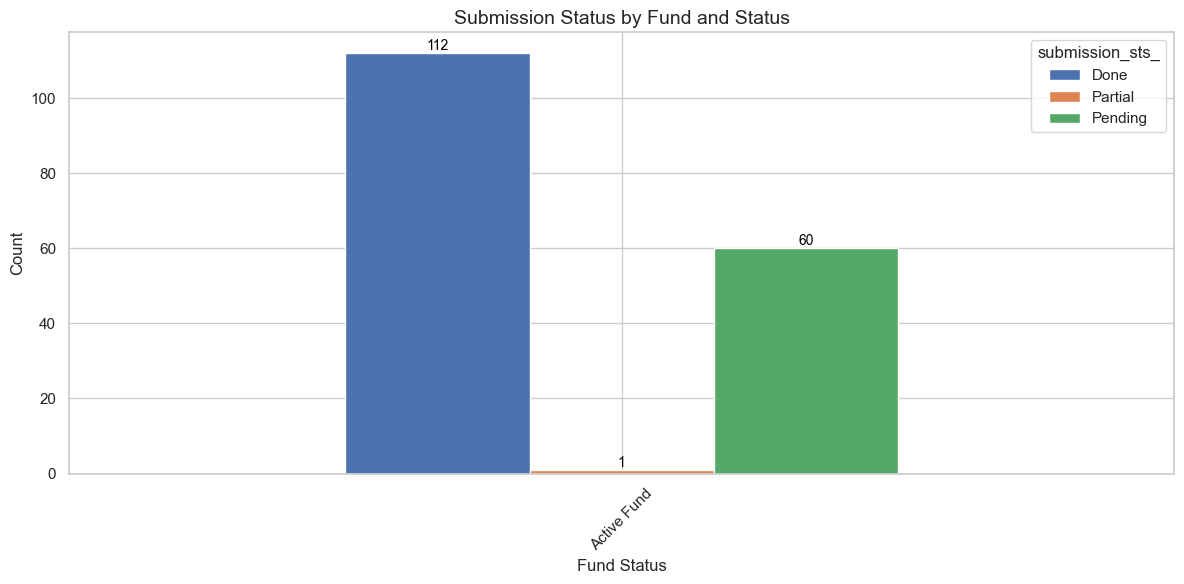

In [346]:
# Group by 'name_of_fund', 'sts' and 'submission_sts_', then unstack to reshape for the bar chart
fund_status_submission2023 = pendata_2023.groupby([ 'sts', 'submission_sts_']).size().unstack().fillna(0)

# Plotting a bar chart (not stacked)
ax = fund_status_submission2023.plot(kind='bar', figsize=(12, 6))

# Set the title and labels
plt.title('Submission Status by Fund and Status', fontsize=14)
plt.xlabel('Fund Status', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add count numbers on top of the bars
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=10, color='black')

# Show the plot
plt.tight_layout()  # Adjust layout for better spacing
plt.show()


In [347]:
# Classify the assessment status in 2023
pendata_2023['assessment_status_category'] = pendata_2023['assessment_sts'].apply(
    lambda x: 'Assessed' if x == 'Done' else ('Non-Assessed' if x == 'Pending' else 'Other')
)

# Perform counts for assessment status categories in 2023
assessment_status_table_2023 = pendata_2023['assessment_status_category'].value_counts().reset_index()
assessment_status_table_2023.columns = ['Assessment Status', 'Count']

# Display the table with borders
assementstatusstyled_table2023 = assessment_status_table_2023.style.set_table_styles(
    [{'selector': 'table', 'props': [('border', '2px solid black')]}, 
     {'selector': 'th', 'props': [('border', '2px solid black')]}, 
     {'selector': 'td', 'props': [('border', '2px solid black')]}]
)

# Display the styled table
assementstatusstyled_table2023


C:\Users\ichingeya\AppData\Local\Temp\ipykernel_18964\3738871701.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pendata_2023['assessment_status_category'] = pendata_2023['assessment_sts'].apply(


,Assessment Status,Count
0,Assessed,104
1,Non-Assessed,69


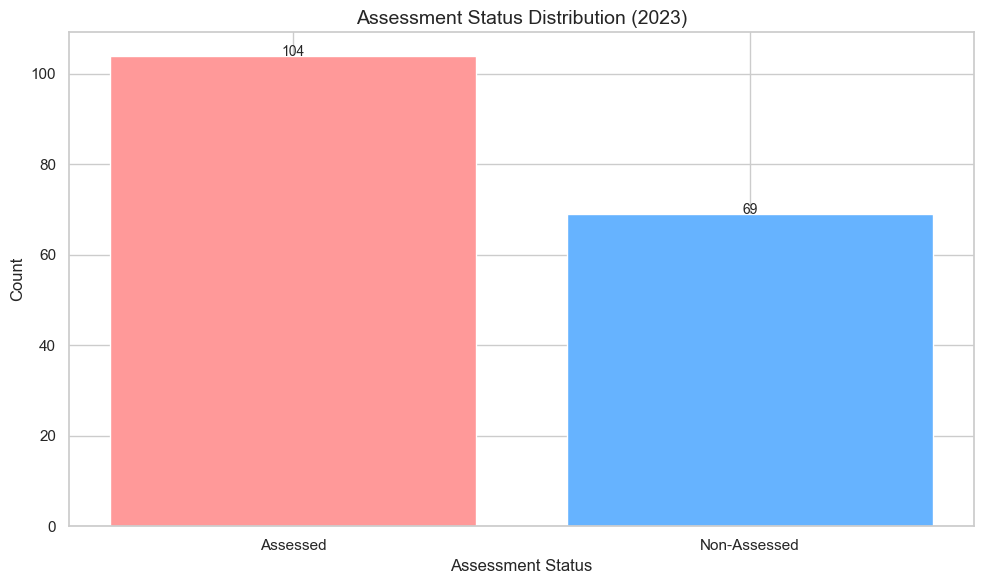

In [348]:
# Get the counts for each assessment status category
assessment_status_counts_2023 = pendata_2023['assessment_status_category'].value_counts()

# Plotting the bar chart for assessment status distribution
plt.figure(figsize=(10, 6))
bars = plt.bar(assessment_status_counts_2023.index, assessment_status_counts_2023.values, color=['#ff9999', '#66b3ff', '#99ff99'])

# Adding title and labels
plt.title('Assessment Status Distribution (2023)', fontsize=14)
plt.xlabel('Assessment Status', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Adding the count numbers on top of the bars
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.05, 
             f'{int(bar.get_height())}', ha='center', fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()


In [349]:
# Count the occurrences of each report location
report_location_counts2023 = pendata_2023['report_location'].value_counts().reset_index()

# Rename the columns for clarity
report_location_counts2023.columns = ['Report Location', 'Count']

# Display the result
print(report_location_counts2023)

# Apply border styling to the report location count table
reportlocationstyled_table2023 = report_location_counts2023.style.set_table_styles(
    [{'selector': 'table', 'props': [('border', '2px solid black')]}, 
     {'selector': 'th', 'props': [('border', '2px solid black')]}, 
     {'selector': 'td', 'props': [('border', '2px solid black')]}]
)

# Display the styled table
reportlocationstyled_table2023


   Report Location  Count
0    Not Populated     79
1  CORE DEPARTMENT     69
2               PA     11
3          MANAGER      9
4          ANALYST      4
5         DIRECTOR      1


,Report Location,Count
0,Not Populated,79
1,CORE DEPARTMENT,69
2,PA,11
3,MANAGER,9
4,ANALYST,4
5,DIRECTOR,1


In [350]:
# Create a new column for approval status categories based on the given criteria
def categorize_approval_status(status):
    if status == 'Yes':
        return 'Approved'
    elif status == 'pending':
        return 'Pending'
    elif status == 'No':
        return 'Non approval'
    else:
        return 'Not populated'

# Apply the categorization function to the approval status column
pendata_2023['approval_status_category'] = pendata_2023['approval_sts'].apply(categorize_approval_status)

# Count the occurrences of each approval status category
approval_status_counts2023 = pendata_2023['approval_status_category'].value_counts().reset_index()
approval_status_counts2023.columns = ['Approval Status', 'Count']

# Display the result
print(approval_status_counts2023)

# Apply border styling to the approval status count table
styled_approval_status_table2023 = approval_status_counts2023.style.set_table_styles(
    [{'selector': 'table', 'props': [('border', '2px solid black')]}, 
     {'selector': 'th', 'props': [('border', '2px solid black')]}, 
     {'selector': 'td', 'props': [('border', '2px solid black')]}]
)

# Display the styled table
styled_approval_status_table2023


  Approval Status  Count
0         Pending    143
1        Approved     30


C:\Users\ichingeya\AppData\Local\Temp\ipykernel_18964\889795283.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pendata_2023['approval_status_category'] = pendata_2023['approval_sts'].apply(categorize_approval_status)


,Approval Status,Count
0,Pending,143
1,Approved,30


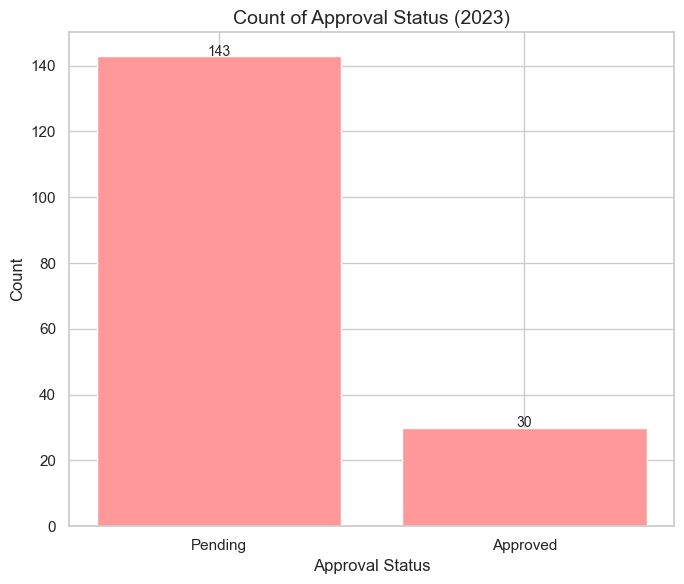

In [351]:
# Plotting the bar chart for approval status categories
plt.figure(figsize=(7, 6))
bars = plt.bar(approval_status_counts2023['Approval Status'], approval_status_counts2023['Count'], color='#ff9999')

# Adding title and labels
plt.title('Count of Approval Status (2023)', fontsize=14)
plt.xlabel('Approval Status', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Adding the count numbers on top of the bars
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.05, 
             f'{int(bar.get_height())}', ha='center', fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()


In [352]:
#3END END END

In [353]:
pip install python-docx matplotlib



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [354]:
# Filter the data based on 'approval_sts' equal to 'No' and 'year' equal to 2023
filtered_data2023 = pendata_combined[(pendata_combined['approval_sts'] == 'No') & (pendata_combined['year'] == 2023)]

# Select the specified columns for the new DataFrame
selected_columns = [
    'name_of_fund', 'approval_sts', 'missing_resolution', 
    'asset_split_diff', 'prior_year_non_approved', 'bonus_issues', 
    'asset_quality', 'other'
]

# Create the new DataFrame with the selected columns
new_dataframe2023 = filtered_data2023[selected_columns]

# Display the new DataFrame
new_dataframe2023


,name_of_fund,approval_sts,missing_resolution,asset_split_diff,prior_year_non_approved,bonus_issues,asset_quality,other


In [355]:
# Filter the data based on 'approval_sts' equal to 'No' and 'year' equal to 2023
filtered_data = pendata_combined[(pendata_combined['approval_sts'] == 'No') & (pendata_combined['year'] == 2019)]

# Select the specified columns for the new DataFrame
selected_columns = [
    'name_of_fund', 'approval_sts', 'missing_resolution', 
    'asset_split_diff', 'prior_year_non_approved', 'bonus_issues', 
    'asset_quality', 'other'
]

# Create the new DataFrame with the selected columns
new_dataframe19 = filtered_data[selected_columns]

# Display the new DataFrame
new_dataframe19


,name_of_fund,approval_sts,missing_resolution,asset_split_diff,prior_year_non_approved,bonus_issues,asset_quality,other


In [356]:
# Filter the data based on 'approval_sts' equal to 'No' and 'year' equal to 2020
filtered_data = pendata_combined[(pendata_combined['approval_sts'] == 'No') & (pendata_combined['year'] == 2020)]

# Select the specified columns for the new DataFrame
selected_columns = [
    'name_of_fund', 'approval_sts', 'missing_resolution', 
    'asset_split_diff', 'prior_year_non_approved', 'bonus_issues', 
    'asset_quality', 'other'
]

# Create the new DataFrame with the selected columns
new_dataframe20 = filtered_data[selected_columns]

# Display the new DataFrame
new_dataframe20


,name_of_fund,approval_sts,missing_resolution,asset_split_diff,prior_year_non_approved,bonus_issues,asset_quality,other


In [357]:
# Filter the data based on 'approval_sts' equal to 'No' and 'year' equal to 2021
filtered_data2021 = pendata_combined[(pendata_combined['approval_sts'] == 'pending') & (pendata_combined['year'] == 2021)]

# Select the specified columns for the new DataFrame
selected_columns = [
    'name_of_fund', 'approval_sts', 'missing_resolution', 
    'asset_split_diff', 'prior_year_non_approved', 'bonus_issues', 
    'asset_quality', 'other'
]

# Create the new DataFrame with the selected columns
new_dataframe2021 = filtered_data2021[selected_columns]

# Display the new DataFrame
new_dataframe2021


,name_of_fund,approval_sts,missing_resolution,asset_split_diff,prior_year_non_approved,bonus_issues,asset_quality,other
347,African Associated Mines,pending,0.0,0.0,0.0,0.0,0.0,0.0
502,COTTON COMPANY OF ZIMBABWE,pending,0.0,0.0,0.0,0.0,0.0,0.0


In [358]:
# Filter the data based on 'approval_sts' equal to 'No' and 'year' equal to 2022
filtered_data2022 = pendata_combined[(pendata_combined['approval_sts'] == 'pending') & (pendata_combined['year'] == 2022)]

# Select the specified columns for the new DataFrame
selected_columns = [
    'name_of_fund', 'approval_sts', 'missing_resolution', 
    'asset_split_diff', 'prior_year_non_approved', 'bonus_issues', 
    'asset_quality', 'other'
]

# Create the new DataFrame with the selected columns
new_dataframe2022 = filtered_data2022[selected_columns]

# Display the new DataFrame
new_dataframe2022




,name_of_fund,approval_sts,missing_resolution,asset_split_diff,prior_year_non_approved,bonus_issues,asset_quality,other
516,Catering Industry Pension Fund,pending,0.0,0.0,0.0,0.0,0.0,0.0
519,Motor Industry,pending,0.0,0.0,0.0,0.0,0.0,0.0
525,Cosmos Capital,pending,0.0,0.0,0.0,0.0,0.0,0.0
539,Homestyle,pending,0.0,0.0,0.0,0.0,0.0,0.0
544,Grain Marketing Board,pending,0.0,0.0,0.0,0.0,0.0,0.0
547,Evolution Group Limited,pending,0.0,0.0,0.0,0.0,0.0,0.0
557,CBZ Group Pension Fund,pending,0.0,0.0,0.0,0.0,1.0,0.0
567,Agribank \n,pending,0.0,0.0,0.0,0.0,0.0,0.0
570,Air Zimbabwe \n,pending,0.0,0.0,0.0,1.0,0.0,0.0
577,COTTON COMPANY OF ZIMBABWE,pending,0.0,0.0,0.0,0.0,0.0,0.0


In [359]:
# Inspect column names and first few rows
print(pendata_combined.columns)



Index(['name_of_fund', 'submission_sts_', 'assessment_sts', 'approval_sts',
       'year', 'sts', 'responsible_person', 'report_location',
       'reason_for_not_approving', 'missing_resolution', 'asset_split_diff',
       'prior_year_non_approved', 'bonus_issues', 'asset_quality', 'other',
       'date_assessment_report_sent_to_core_drpt',
       'date_supervisory_letter_sent_to_entity_by_core_drpt',
       'supervisory_letter_sent_yes_no_exemption_dissolution',
       'conditional_approval_to_proceed', 'verification_satus',
       'director_review', 'director_review_reminder', 'modified_by',
       'principal_analyst', 'missing_documents_', 'item_type', 'path'],
      dtype='object')


In [360]:
print(pendata_combined.columns)

Index(['name_of_fund', 'submission_sts_', 'assessment_sts', 'approval_sts',
       'year', 'sts', 'responsible_person', 'report_location',
       'reason_for_not_approving', 'missing_resolution', 'asset_split_diff',
       'prior_year_non_approved', 'bonus_issues', 'asset_quality', 'other',
       'date_assessment_report_sent_to_core_drpt',
       'date_supervisory_letter_sent_to_entity_by_core_drpt',
       'supervisory_letter_sent_yes_no_exemption_dissolution',
       'conditional_approval_to_proceed', 'verification_satus',
       'director_review', 'director_review_reminder', 'modified_by',
       'principal_analyst', 'missing_documents_', 'item_type', 'path'],
      dtype='object')


In [361]:
# Drop rows where 'year' is NaN or convert NaN to a specific year (e.g., 0 or a default year)
pendata_combined = pendata_combined.dropna(subset=['year'])  # Drop rows with NaN in the 'year' column

# Now, convert 'year' to an integer type
pendata_combined['year'] = pendata_combined['year'].astype(int)


In [362]:
print(pendata_combined['year'].dtype)


int32


In [363]:
display(pendata_combined)

,name_of_fund,submission_sts_,assessment_sts,approval_sts,year,sts,responsible_person,report_location,reason_for_not_approving,missing_resolution,...,supervisory_letter_sent_yes_no_exemption_dissolution,conditional_approval_to_proceed,verification_satus,director_review,director_review_reminder,modified_by,principal_analyst,missing_documents_,item_type,path
0,African Banking Corporation Zimbabwe,Done,Done,Yes,2019,Active Fund,Isheanesu Chingeya,Not Populated,Assessment report submitted to the fund,0.0,...,Yes,Not Populated,Not Populated,Yes,Yes,Isheanesu Chingeya,Memory Macharaga,0.0,Item,sites/ActuarialTeam/Lists/Pensions Guidance Pa...
1,African Distillers,Done,Done,Yes,2019,Active Fund,Not Populated,CORE DEPARTMENT,Not Populated,0.0,...,Yes,Not Populated,Not Populated,Yes,Yes,Mqhele B. Ncube,Memory Macharaga,0.0,Item,sites/ActuarialTeam/Lists/Pensions Guidance Pa...
2,Agribank,Pending,Done,pending,2019,Active Fund,Not Populated,Not Populated,Not Populated,0.0,...,Yes,Not Populated,Not Populated,Not Populated,Not Populated,Mqhele B. Ncube,Memory Macharaga,0.0,Item,sites/ActuarialTeam/Lists/Pensions Guidance Pa...
3,Air Zimbabwe,Pending,Done,Yes,2019,Active Fund,Not Populated,Not Populated,Not Populated,0.0,...,Yes,Not Populated,Not Populated,Not Populated,Not Populated,Best T. Mabhugu,Memory Macharaga,0.0,Item,sites/ActuarialTeam/Lists/Pensions Guidance Pa...
4,Allied Timbers Holdings,Partial,Done,Not Populated,2019,Active Fund,Not Populated,Not Populated,Yes,0.0,...,Yes,Not Populated,Not Populated,Not Populated,Not Populated,Mqhele B. Ncube,Memory Macharaga,0.0,Item,sites/ActuarialTeam/Lists/Pensions Guidance Pa...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
864,BAZ,Done,Done,pending,2022,Active Fund,Not Populated,PA,Not Populated,0.0,...,Not Populated,Not Populated,Not Populated,Not Populated,Not Populated,Best T. Mabhugu,Not Populated,0.0,Item,sites/ActuarialTeam/Lists/Pensions Guidance Pa...
865,AMG pension fund,Done,Done,Yes,2020,Active Fund,Mqhele B. Ncube,MANAGER,Not Populated,0.0,...,Not Populated,Not Populated,Not Populated,Not Populated,Not Populated,Mqhele B. Ncube,Not Populated,0.0,Item,sites/ActuarialTeam/Lists/Pensions Guidance Pa...
866,AMG pension fund,Done,Done,Yes,2021,Active Fund,Mqhele B. Ncube,MANAGER,Not Populated,0.0,...,Not Populated,Not Populated,Not Populated,Not Populated,Not Populated,Mqhele B. Ncube,Not Populated,0.0,Item,sites/ActuarialTeam/Lists/Pensions Guidance Pa...
867,AMG pension fund,Done,Done,Yes,2022,Active Fund,Mqhele B. Ncube,CORE DEPARTMENT,Not Populated,0.0,...,Not Populated,Not Populated,Not Populated,Not Populated,Not Populated,Best T. Mabhugu,Not Populated,0.0,Item,sites/ActuarialTeam/Lists/Pensions Guidance Pa...


In [364]:
from datetime import datetime
today_date = datetime.today().strftime('%d %B %Y')

In [365]:
filterd_days_past.to_excel("entities_to_follow.xlsx")

In [366]:


from docx import Document
from docx.oxml.ns import qn
from docx.oxml import OxmlElement
import io
from docx.shared import Inches

def add_page_numbers(doc):
    sections = doc.sections
    for section in sections:
        footer = section.footer
        paragraph = footer.paragraphs[0]
        paragraph.alignment = 1  # Center alignment for page numbers

        # Create the page number element (Page X of Y)
        page_num_run = paragraph.add_run()
        
        fldChar1 = OxmlElement('w:fldChar')
        fldChar1.set(qn('w:fldCharType'), 'begin')
        instrText = OxmlElement('w:instrText')
        instrText.set(qn('xml:space'), 'preserve')
        instrText.text = "PAGE"
        fldChar2 = OxmlElement('w:fldChar')
        fldChar2.set(qn('w:fldCharType'), 'end')

        page_num_run._r.append(fldChar1)
        page_num_run._r.append(instrText)
        page_num_run._r.append(fldChar2)
        
        # Adding the "of" part for total pages (Page X of Y)
        page_num_run = paragraph.add_run(" of ")
        fldChar3 = OxmlElement('w:fldChar')
        fldChar3.set(qn('w:fldCharType'), 'begin')
        instrText2 = OxmlElement('w:instrText')
        instrText2.set(qn('xml:space'), 'preserve')
        instrText2.text = "NUMPAGES"
        fldChar4 = OxmlElement('w:fldChar')
        fldChar4.set(qn('w:fldCharType'), 'end')

        page_num_run._r.append(fldChar3)
        page_num_run._r.append(instrText2)
        page_num_run._r.append(fldChar4)

def add_toc(doc):
    # Add a heading for the TOC
    doc.add_heading('Table of Contents', level=1)

    # Add the TOC field
    paragraph = doc.add_paragraph()
    run = paragraph.add_run()

    fldChar1 = OxmlElement('w:fldChar')
    fldChar1.set(qn('w:fldCharType'), 'begin')
    instrText = OxmlElement('w:instrText')
    instrText.set(qn('xml:space'), 'preserve')
    instrText.text = "TOC \\o \"1-3\" \\h \\z \\u"
    fldChar2 = OxmlElement('w:fldChar')
    fldChar2.set(qn('w:fldCharType'), 'separate')
    fldChar3 = OxmlElement('w:updateFields')
    fldChar3.set(qn('w:val'), 'true')
    fldChar4 = OxmlElement('w:fldChar')
    fldChar4.set(qn('w:fldCharType'), 'end')

    run._r.append(fldChar1)
    run._r.append(instrText)
    run._r.append(fldChar2)
    run._r.append(fldChar3)
    run._r.append(fldChar4)
    
    doc.add_page_break()

# Create a new Word Document
doc = Document()

# Add the Table of Contents first
add_toc(doc)



# Add page numbers (after TOC and headings)
add_page_numbers(doc)

doc.add_heading(f'Guidance Paper Analysis As At {today_date} Run', level=0)
doc.add_paragraph(
    "This document presents a summary of the statistics for the guidance paper submissions and assessment data "
    "covering the period from 2019 to 2023.")

doc.add_paragraph("The purpose of this report is to provide a concise overview of key data "
    "and trends, tracking progress in submissions, assessments, and approvals. By analyzing these metrics, the report "
    "aims to offer insights into the industry's position in compliance with the guidance paper.")

doc.add_paragraph("The data has been Extracted from the Ms lists Online Database  "
    "The accuracy of the analysis is directly tied to the quality and accuracy of the data provided from the MS List database."
    "As such, we recommend the database to be updated in from time to time"
)


doc.add_paragraph(
    f"The Appendix section of this report shows a list of all the entities whose resubmission deadline has passed according to the database. "
    "We recommend the Pensions Team to Follow up such Pension Funds.")

# Initialize a list to store the combined data for all years
combined_yearly_data = []

# Loop through each year from 2023 to 2019
for year in range(2023, 2018, -1):
    # Filter data for the specific year
    pendata_year = pendata_combined[pendata_combined['year'] == year]

    # ----------------- Approval Status Counts (Only 'Yes' approved) -----------------
    approval_counts = pendata_year[pendata_year['approval_sts'] == 'Yes'].shape[0]

    # ----------------- Assessment Status Counts (Only 'Done' assessed) -----------------
    assessment_counts = pendata_year[pendata_year['assessment_sts'] == 'Done'].shape[0]

    # ----------------- Submission Status Counts (Only 'Done' submissions) -----------------
    submission_counts = pendata_year[pendata_year['submission_sts_'] == 'Done'].shape[0]

    # Combine the data for the current year
    combined_yearly_data.append({
        'Year': year,
        'Submissions': submission_counts,
        'Approvals': approval_counts,
        'Assessments': assessment_counts
    })

# Convert the combined data into a DataFrame for Year-to-Year Table
combined_yearly_df = pd.DataFrame(combined_yearly_data)

# Add a heading and a brief explanation for the combined table
doc.add_heading('Year to Year Comparison of Submissions, Approvals, and Assessments', level=2)
doc.add_paragraph(
    "The table and graph below shows the year-over-year data for submissions, approvals, and assessments from 2019 to 2023. "
    "It provides insights into the number of submissions received, the number of approvals granted, and the number of assessments "
    "completed each year. This comparison can help identify trends and performance over the years."
)

# Create and add the combined year-to-year table to the document
table = doc.add_table(rows=combined_yearly_df.shape[0] + 1, cols=combined_yearly_df.shape[1])
table.style = 'Table Grid'

# Add header row for the table
for j in range(combined_yearly_df.shape[1]):
    table.cell(0, j).text = combined_yearly_df.columns[j]

# Add the data rows
for i in range(combined_yearly_df.shape[0]):
    for j in range(combined_yearly_df.shape[1]):
        table.cell(i + 1, j).text = str(combined_yearly_df.iat[i, j])

# Create a Combined Bar Chart for Submissions, Approvals, and Assessments over the years
plt.figure(figsize=(8, 6))

# Plot bars for each category (submissions, approvals, and assessments)
bar_width = 0.25
index = range(len(combined_yearly_df))  # x-axis index for years

# Plotting the bars for Submissions, Approvals, and Assessments
bars_submissions = plt.bar([i - bar_width for i in index], combined_yearly_df['Submissions'], bar_width, label='Submissions', color='#66b3ff')
bars_approvals = plt.bar(index, combined_yearly_df['Approvals'], bar_width, label='Approvals', color='#99ff99')
bars_assessments = plt.bar([i + bar_width for i in index], combined_yearly_df['Assessments'], bar_width, label='Assessments', color='#ffcc99')

# Adding titles and labels
plt.title('Year-to-Year Graph: Submissions, Approvals, and Assessments', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(index, combined_yearly_df['Year'])
plt.legend(title='Categories')

# Add counts on top of the bars
for bars in [bars_submissions, bars_approvals, bars_assessments]:
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.5, str(int(yval)), ha='center', va='bottom', fontsize=12)

# Save plot to BytesIO
img_stream = io.BytesIO()
plt.tight_layout()
plt.savefig(img_stream, format='png')
plt.close()
img_stream.seek(0)

# Insert the plot into the Word document
doc.add_picture(img_stream, width=Inches(5.5))

# Now process individual year data for submission status, assessment status, approval status, non-approval reasons, and report location

# Loop through each year from 2023 to 2019
for year in range(2023, 2018, -1):
    # Filter data for the specific year
    pendata_year = pendata_combined[pendata_combined['year'] == year]

    
    doc.add_heading(f'Entities to Follow Up', level=0)
    doc.add_paragraph(
        f"The table below shows a list of all the entities whose resubmission deadline has passed according to the database. We recommend the Pensions Team to Follow up such Pension Funds")

                

# Insert.ed Code: Summary Statistics Section
    doc.add_heading(f'Summary Statistics for the Year {year}', level=0)
    doc.add_paragraph(
    f"Below are the statistics for the year {year}, including the number of submissions, approvals, and assessments. "
    "This provides a quick overview of the key metrics for the year."
    )


    #########################3
    
    # ----------------- Submission Status -----------------
    pendata_year['submission_status'] = pendata_year['submission_sts_'].apply(
        lambda x: 'Submitted' if x == 'Done' else ('Partial' if x == 'Partial' else 'Pending')
    )
    submission_status_table_year = pendata_year['submission_status'].value_counts().reset_index()
    submission_status_table_year.columns = ['Submission Status', 'Count']

    doc.add_heading(f'Submission Status Distribution Table ({year})', level=3)
    doc.add_paragraph(f"The table below shows the submission status distribution for the year {year}. This table provides a breakdown of the counts for each submission status category.")

    # Add submission status table to the document
    table = doc.add_table(rows=submission_status_table_year.shape[0] + 1, cols=submission_status_table_year.shape[1])
    table.style = 'Table Grid'
    for j in range(submission_status_table_year.shape[1]):
        table.cell(0, j).text = submission_status_table_year.columns[j]
    for i in range(submission_status_table_year.shape[0]):
        for j in range(submission_status_table_year.shape[1]):
            table.cell(i + 1, j).text = str(submission_status_table_year.iat[i, j])

    # Create a graph for submission status
    plt.figure(figsize=(4.5, 4.5))  # Adjusted size to fit better in Word
    bars = plt.bar(submission_status_table_year['Submission Status'], submission_status_table_year['Count'], color=['#66b3ff', '#99ff99', '#ffcc99'])
    plt.title(f'Submission Status Distribution ({year})', fontsize=16)
    plt.xlabel('Submission Status', fontsize=12)
    plt.ylabel('Count', fontsize=12)
    for bar in bars:
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5, str(int(bar.get_height())), ha='center', va='bottom', fontsize=12)
    plt.tight_layout()

    # Save the plot to a BytesIO object
    img_stream = io.BytesIO()
    plt.savefig(img_stream, format='png')
    img_stream.seek(0)  # Go to the start of the stream

    # Add the plot image directly to the Word document
    doc.add_picture(img_stream, width=Inches(4.5))
    plt.close()

    # ----------------- Assessment Status -----------------
    assessment_counts = pendata_year[pendata_year['assessment_sts'] == 'Done'].shape[0]
    assessment_status_table_year = pd.DataFrame({
        'Assessment Status': ['Done', 'Pending'],
        'Count': [assessment_counts, pendata_year.shape[0] - assessment_counts]
    })

    doc.add_heading(f'Assessment Status Distribution Table ({year})', level=2)
    doc.add_paragraph(f"The table below shows the assessment status distribution for the year {year}. This table provides the number of completed and pending assessments.")

    # Add assessment status table to the document
    table = doc.add_table(rows=assessment_status_table_year.shape[0] + 1, cols=assessment_status_table_year.shape[1])
    table.style = 'Table Grid'
    for j in range(assessment_status_table_year.shape[1]):
        table.cell(0, j).text = assessment_status_table_year.columns[j]
    for i in range(assessment_status_table_year.shape[0]):
        for j in range(assessment_status_table_year.shape[1]):
            table.cell(i + 1, j).text = str(assessment_status_table_year.iat[i, j])

    # Create a graph for assessment status
    plt.figure(figsize=(4.5, 4.5))  # Adjusted size for better fitting
    bars = plt.bar(assessment_status_table_year['Assessment Status'], assessment_status_table_year['Count'], color=['#66b3ff', '#ffcc99'])
    plt.title(f'Assessment Status Distribution ({year})', fontsize=14)
    plt.xlabel('Assessment Status', fontsize=12)
    plt.ylabel('Count', fontsize=12)
    for bar in bars:
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5, str(int(bar.get_height())), ha='center', va='bottom', fontsize=12)
    plt.tight_layout()

    # Save the plot to a BytesIO object
    img_stream = io.BytesIO()
    plt.savefig(img_stream, format='png')
    img_stream.seek(0)  # Go to the start of the stream

    # Add the plot image directly to the Word document
    doc.add_picture(img_stream, width=Inches(4.5))
    plt.close()

    # ----------------- Approval Status -----------------
    approval_counts_yes = pendata_year[pendata_year['approval_sts'] == 'Yes'].shape[0]
    approval_counts_no = pendata_year[pendata_year['approval_sts'] == 'No'].shape[0]
    approval_counts_pending = pendata_year[pendata_year['approval_sts'] == 'pending'].shape[0]

    approval_status_table_year = pd.DataFrame({
        'Approval Status': ['Yes', 'No', 'Pending'],
        'Count': [approval_counts_yes, approval_counts_no, approval_counts_pending]
    })

    doc.add_heading(f'Approval Status Distribution Table ({year})', level=2)
    doc.add_paragraph(f"The table below shows the approval status distribution for the year {year}. This table shows how many submissions were approved, not approved and those pending.")

    # Add approval status table to the document
    table = doc.add_table(rows=approval_status_table_year.shape[0] + 1, cols=approval_status_table_year.shape[1])
    table.style = 'Table Grid'
    for j in range(approval_status_table_year.shape[1]):
        table.cell(0, j).text = approval_status_table_year.columns[j]
    for i in range(approval_status_table_year.shape[0]):
        for j in range(approval_status_table_year.shape[1]):
            table.cell(i + 1, j).text = str(approval_status_table_year.iat[i, j])

            # Create a pie chart for approval status
    plt.figure(figsize=(4.5, 4.5))

    # Generate the pie chart without percentage labels inside the pie
    wedges, texts = plt.pie(approval_status_table_year['Count'], 
                            labels=approval_status_table_year['Approval Status'], 
                            startangle=90, 
                            colors=['#66b3ff', '#ffcc99', '#ff9966'], 
                            wedgeprops={'edgecolor': 'black'})

    # Use a list comprehension to generate label-text pairs with percentages
    labels = [f"{text.get_text()} - {count/approval_status_table_year['Count'].sum()*100:.1f}%" 
              for text, count in zip(texts, approval_status_table_year['Count'])]

    # Add the legend outside the pie chart
    plt.legend(wedges, labels, title="Approval Status", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

    # Title of the chart
    doc.add_heading(f'Approval Status Distribution graph ({year})', level=2)
    doc.add_paragraph(f"The graph below shows the approval status distribution for the year {year}. The graph shows how many submissions were approved, not approved and those pending.")
    plt.title(f'Approval Status Distribution ({year})', fontsize=16)
    # Save the plot to a BytesIO object
    img_stream = io.BytesIO()
    plt.savefig(img_stream, format='png', bbox_inches='tight')  # Ensure the plot fits well
    img_stream.seek(0)  # Go to the start of the stream

    # Add the plot image directly to the Word document
    doc.add_picture(img_stream, width=Inches(4.5))

    # Close the plot
    plt.close()



    # ----------------- Non-Approval Reasons -----------------
    
    filtered_data = pendata_combined[((pendata_combined['approval_sts'] == 'pending') | (pendata_combined['approval_sts'] == 'No')) & 
    (pendata_combined['year'] == year)]
    selected_columns = [
        'name_of_fund', 'approval_sts', 'missing_resolution', 
        'asset_split_diff', 'prior_year_non_approved', 'bonus_issues', 
        'asset_quality', 'other'
    ]
    new_dataframe = filtered_data[selected_columns]
    non_approval_counts = new_dataframe.iloc[:, 2:].apply(lambda x: (x == 1.0).sum(), axis=0)

    doc.add_heading(f'Non-Approval Reasons ({year})', level=2)
    doc.add_paragraph(f"The tabke below shows the counts for each non-approval reason for the year {year}.The categories listed are the main causes for non approvals ")

    # Add table for non-approval reasons
    table = doc.add_table(rows=non_approval_counts.shape[0] + 1, cols=2)
    table.style = 'Table Grid'
    table.cell(0, 0).text = "Reason"
    table.cell(0, 1).text = "Count"
    for i, reason in enumerate(non_approval_counts.index):
        table.cell(i + 1, 0).text = reason
        table.cell(i + 1, 1).text = str(non_approval_counts[reason])

    
# Report Location (Assumed column 'report_location')
    doc.add_heading(f'Report Location Distribution ({year})', level=2)
    doc.add_paragraph(f"The table below show the report locations for the repots that were assessed and those that are under internal review for the year {year}. ")
    report_location_table_year = pendata_year['report_location'].value_counts().reset_index()
    report_location_table_year.columns = ['Location', 'Count']
    report_location_table = doc.add_table(rows=report_location_table_year.shape[0] + 1, cols=report_location_table_year.shape[1])
    report_location_table.style = 'Table Grid'
    for j in range(report_location_table_year.shape[1]):
        report_location_table.cell(0, j).text = report_location_table_year.columns[j]
    for i in range(report_location_table_year.shape[0]):
        for j in range(report_location_table_year.shape[1]):
            report_location_table.cell(i + 1, j).text = str(report_location_table_year.iat[i, j])
            plt.close()
    
    
    doc.add_heading(f'Entities to Follow Up', level=2)
# Save the Document
doc.save('Final Guidance_Paper_Report_with_Charts.docx')

C:\Users\ichingeya\AppData\Local\Temp\ipykernel_18964\1346218871.py:210: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pendata_year['submission_status'] = pendata_year['submission_sts_'].apply(
C:\Users\ichingeya\AppData\Local\Temp\ipykernel_18964\1346218871.py:210: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pendata_year['submission_status'] = pendata_year['submission_sts_'].apply(
C:\Users\ichingeya\AppData\Local\Temp\ipykernel_18964\1346218871.py:210: SettingWithCopyWarning: 
A value is trying to be se